# Setup

https://agupubs.onlinelibrary.wiley.com/doi/epdf/10.1029/2011JC007531

In [1]:
# import your standard packages
%run ../../global_tools/start.py

# import your local functions
from local_functions import *

# make sure the figures plot inline rather than at the end
%matplotlib inline

Default libraries loaded.


# Paths and Parameters

In [2]:
# these are for grouping into the IOD years since the effects are 
# not confined to a single year. You chose this to have an even 
# number of months around the IOD peak..but now you left it in
# line with the SLA plots that start in 06 and end in 05
IODyear_begin = '-06-01' # month-day of IOD year
IODyear_end = '-05-31' # month-day of year AFTER IOD year

# Get Data

In [3]:
# SLA
ds_SLA = xr.open_dataset('../data/sla_processed.nc')
ds_SLA

<xarray.Dataset>
Dimensions:           (day_time: 10013, lat: 138, loc_list: 7, lon: 216, month: 12, no_stations: 574, time: 329)
Coordinates:
  * lon               (lon) float64 48.62 48.88 49.12 ... 101.9 102.1 102.4
  * lat               (lat) float64 -1.375 -1.125 -0.875 ... 32.38 32.62 32.88
  * time              (time) datetime64[ns] 1993-01-01 1993-02-01 ... 2020-05-01
  * day_time          (day_time) datetime64[ns] 1993-01-01 ... 2020-05-31
  * month             (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * no_stations       (no_stations) float64 1.0 2.0 3.0 ... 572.0 573.0 574.0
  * loc_list          (loc_list) int64 0 80 201 291 382 491 573
Data variables:
    daily_sla         (day_time, lat, lon) float64 ...
    mon_sla           (time, lat, lon) float64 ...
    mon_sla_mon_clim  (month, lat, lon) float64 ...
    mon_sla_mon_anom  (time, lat, lon) float64 ...
    sta_loninds       (no_stations) int64 ...
    sta_latinds       (no_stations) int64 ...
    sta_lon           (no

In [4]:

mon_sla = ds_SLA['mon_sla']
mon_sla_mon_anom = ds_SLA['mon_sla_mon_anom']
mon_sla_mon_clim = ds_SLA['mon_sla_mon_clim']
lat = mon_sla.lat.values
lon = mon_sla.lon.values

# Get DMI

In [5]:
# load DMI data
ds_DMI= xr.open_dataset('../data/dmi_processed.nc')

# lists of positive iod years for now taken from sources above 1994-2018 unsure after 2016
posIODyears = list(np.array(ds_DMI.pos_IOD_years)) #[1994,1997,2006,2012,2015]
negIODyears = list(np.array(ds_DMI.neg_IOD_years)) #[1996,1998,2001,2010,2014,2016]
neuIODyears = list(np.array(ds_DMI.neu_IOD_years)) # [1995,1999,2000,2002,2003,2004,2005,2007,2008,2009,2011,2012,2013]

sposIODyears = list(np.array(ds_DMI.spos_IOD_years)) 
snegIODyears = list(np.array(ds_DMI.sneg_IOD_years)) 

wposIODyears = list(np.array(ds_DMI.wpos_IOD_years)) 
wnegIODyears = list(np.array(ds_DMI.wneg_IOD_years)) 

ds_DMI

<xarray.Dataset>
Dimensions:          (negyears: 10, neuyears: 40, posyears: 13, snegyears: 6, sposyears: 6, time: 744, wnegyears: 4, wposyears: 7)
Coordinates:
  * time             (time) datetime64[ns] 1958-06-01 1958-07-01 ... 2020-05-01
  * posyears         (posyears) int64 1961 1963 1967 1972 ... 2015 2018 2019
  * negyears         (negyears) int64 1960 1964 1970 1971 ... 1998 2010 2016
  * neuyears         (neuyears) int64 1958 1959 1962 1965 ... 2014 2017 2020
  * sposyears        (sposyears) int64 1961 1972 1994 1997 2006 2019
  * snegyears        (snegyears) int64 1960 1964 1970 1996 1998 2016
  * wposyears        (wposyears) int64 1963 1967 1977 1982 2012 2015 2018
  * wnegyears        (wnegyears) int64 1971 1975 1992 2010
Data variables:
    dmi              (time) float64 ...
    dmi_3mo_runmean  (time) float64 ...
    pos_IOD_years    (posyears) int64 1961 1963 1967 1972 ... 2015 2018 2019
    neg_IOD_years    (negyears) int64 1960 1964 1970 1971 ... 1998 2010 2016
    neu

/home/jennap/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


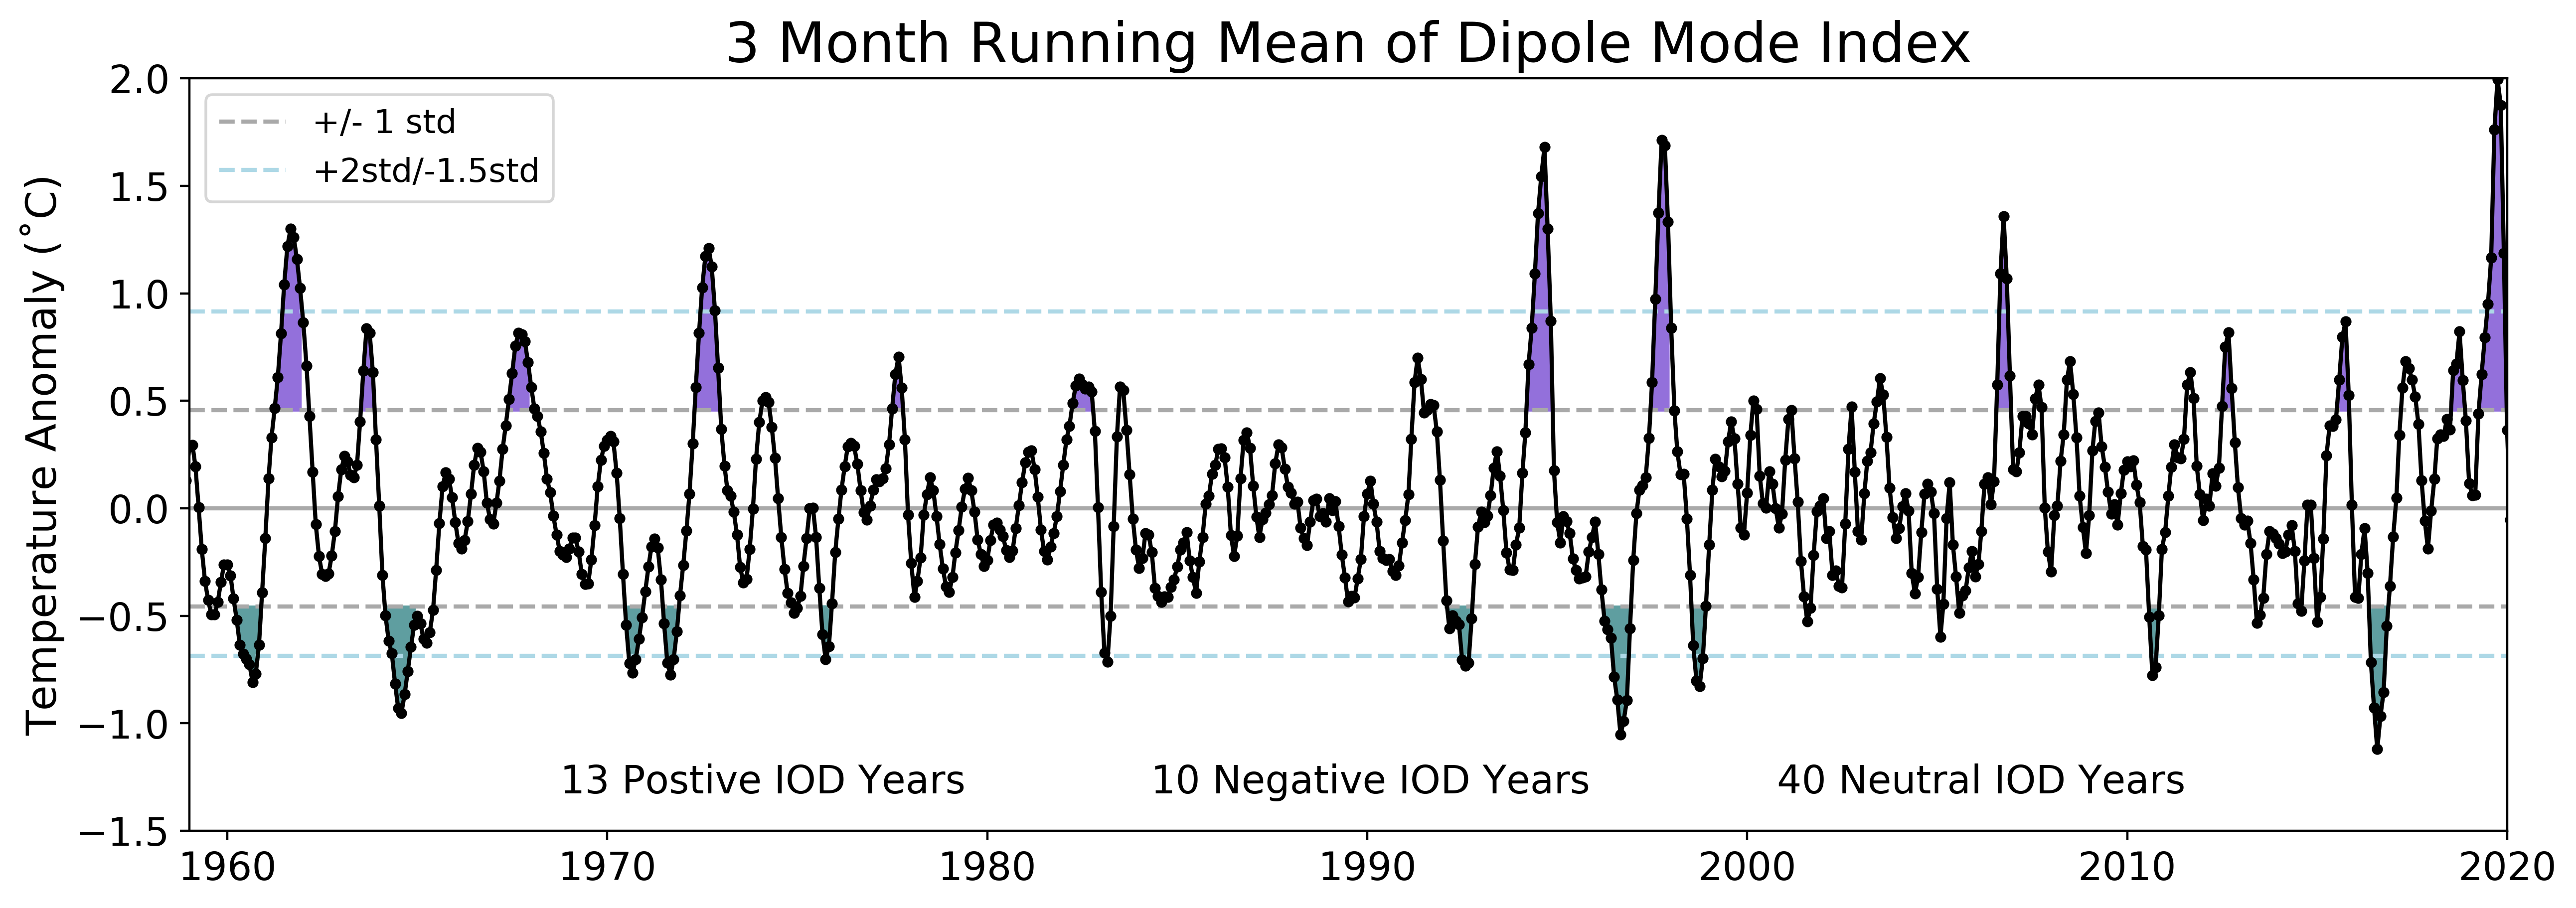

In [6]:
# plot before combinging into one

params = {'legend.fontsize': 12,
         'axes.labelsize': 15,
         'axes.titlesize': 20,
         'xtick.labelsize':14,
         'ytick.labelsize':14}

pylab.rcParams.update(params)

fig = plt.figure(figsize=(15, 5), dpi = 400)
plt.axhline(y=0, color='darkgray', linestyle='-')
std1 = plt.axhline(y=ds_DMI.dmi_3mo_runmean.std(), color='darkgray', linestyle='--')
plt.axhline(y=-ds_DMI.dmi_3mo_runmean.std(), color='darkgray', linestyle='--')
std2 = plt.axhline(y=ds_DMI.dmi_3mo_runmean.std()*2, color='lightblue', linestyle='--')
plt.axhline(y=-ds_DMI.dmi_3mo_runmean.std()*1.5, color='lightblue', linestyle='--')
plt.plot(ds_DMI.time,ds_DMI.dmi_3mo_runmean, marker = '.',color='k')

for posyear in ds_DMI.pos_IOD_years:
    
    ind = ds_DMI.time.dt.year == posyear
    x = np.array(ds_DMI.time[ind])
    y2 = np.array(ds_DMI.dmi_3mo_runmean.std())
    y1 = np.array(ds_DMI.dmi_3mo_runmean[ind])
    
    plt.fill_between(x,y1,y2,where=y1 > y2,color = 'mediumpurple')
    
for negyear in ds_DMI.neg_IOD_years:
    
    ind = ds_DMI.time.dt.year == negyear
    x = np.array(ds_DMI.time[ind])
    y1 = -np.array(ds_DMI.dmi_3mo_runmean.std())
    y2 = np.array(ds_DMI.dmi_3mo_runmean[ind])
    
    plt.fill_between(x,y1,y2,where=y1 > y2,color = 'cadetblue')
add_text(plt.gca(), str(len(ds_DMI.posyears)) + ' Postive IOD Years', x = 0.16,y=0.05, fontsize = 14)
add_text(plt.gca(), str(len(ds_DMI.negyears)) + ' Negative IOD Years', x = 0.415,y=0.05, fontsize = 14)
add_text(plt.gca(), str(len(ds_DMI.neuyears)) + ' Neutral IOD Years', x = 0.685,y=0.05, fontsize = 14)
plt.xlim(dt.date(1959,1,1),dt.date(2020,1,1))
plt.ylim([-1.5,2])
plt.ylabel('Temperature Anomaly (˚C)')
plt.title('3 Month Running Mean of Dipole Mode Index')

l = plt.legend([std1,std2],['+/- 1 std', '+2std/-1.5std'],facecolor = 'w', loc = 'upper left')



In [7]:
# import numpy as np
# import matplotlib.pyplot as plt
# title_text = 'List of IOD Years'
# footer_text = 'June 24, 2020'
# fig_background_color = 'white'
# fig_border = 'white'
# # data =  [
# #             [ '5 year',  66386, 174296,   75131,  577908,  32015],
# #             ['10 year',  58230, 381139,   78045,   99308, 160454],
# #             ['20 year',  89135,  80552,  152558,  497981, 603535],
# #             ['30 year',  78415,  81858,  150656,  193263,  69638],
# #             ['40 year', 139361, 331509,  343164,  781380,  52269],
# #         ]

# posIOD = ['Positive IOD Years']
# posIOD.append(list(np.array(ds_DMI.pos_IOD_years)))
# negIOD = ['Negative IOD Years']
# negIOD.append(list(np.array(ds_DMI.neg_IOD_years)))

# data =  [posIOD,negIOD]
# # Pop the headers from the data array
# # column_headers = data.pop(0)
# row_headers = [x.pop(0) for x in data]
# # Table data needs to be non-numeric text. Format the data
# # while I'm at it.
# cell_text = []
# for row in data:
#     cell_text.append([f'{x/1000:1.1f}' for x in row])
# # Get some lists of color specs for row and column headers
# rcolors = plt.cm.BuPu(np.full(len(row_headers), 0.1))
# ccolors = plt.cm.BuPu(np.full(len(column_headers), 0.1))
# # Create the figure. Setting a small pad on tight_layout
# # seems to better regulate white space. Sometimes experimenting
# # with an explicit figsize here can produce better outcome.
# plt.figure(linewidth=2,
#            edgecolor=fig_border,
#            facecolor=fig_background_color,
#            tight_layout={'pad':1},
#            dpi = 200,
#            #figsize=(5,3)
#           )
# # Add a table at the bottom of the axes
# the_table = plt.table(cellText=cell_text,
#                       rowLabels=row_headers,
#                       rowColours=rcolors,
#                       rowLoc='right',
#                       colColours=ccolors,
#                       loc='center')
# # Scaling is the only influence we have over top and bottom cell padding.
# # Make the rows taller (i.e., make cell y scale larger).
# the_table.scale(1, 1.5)
# # Hide axes
# ax = plt.gca()
# ax.get_xaxis().set_visible(False)
# ax.get_yaxis().set_visible(False)
# # Hide axes border
# plt.box(on=None)
# # Add title
# plt.suptitle(title_text)
# # Force the figure to update, so backends center objects correctly within the figure.
# # Without plt.draw() here, the title will center on the axes and not the figure.
# plt.draw()


# Group Anomalies Into IOD Phases

In [8]:
var = mon_sla_mon_anom
# ------------------------------------------------------------#
# Anomaly
# ------------------------------------------------------------#
    
# average over the positive IOD years -------------------------------------------# 
posIOD_mon_sla_mon_anom = IOD_year_group_grid(var,IODyear_begin,IODyear_end,posIODyears)

# average over the negative IOD years -------------------------------------------# 
negIOD_mon_sla_mon_anom = IOD_year_group_grid(var,IODyear_begin,IODyear_end,negIODyears)

# average over the neutral IOD years -------------------------------------------# 
neuIOD_mon_sla_mon_anom = IOD_year_group_grid(var,IODyear_begin,IODyear_end,neuIODyears)

# ------------------------------------------------------------#
# Strong Anomaly
# ------------------------------------------------------------#
    
# average over the positive IOD years -------------------------------------------# 
sposIOD_mon_sla_mon_anom = IOD_year_group_grid(var,IODyear_begin,IODyear_end,sposIODyears)

# average over the positive IOD years -------------------------------------------# 
snegIOD_mon_sla_mon_anom = IOD_year_group_grid(var,IODyear_begin,IODyear_end,snegIODyears)


# ------------------------------------------------------------#
# Weak Anomaly
# ------------------------------------------------------------#
    
# average over the positive IOD years -------------------------------------------# 
wposIOD_mon_sla_mon_anom = IOD_year_group_grid(var,IODyear_begin,IODyear_end,wposIODyears)

# average over the positive IOD years -------------------------------------------# 
wnegIOD_mon_sla_mon_anom = IOD_year_group_grid(var,IODyear_begin,IODyear_end,wnegIODyears)


# ------------------------------------------------------------#
# Annual Cycle
# ------------------------------------------------------------#
mon_sla_mon_clim = mon_sla_mon_clim.roll(month=-5,roll_coords = False)

/home/jennap/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


# Hovmueller Diagrams

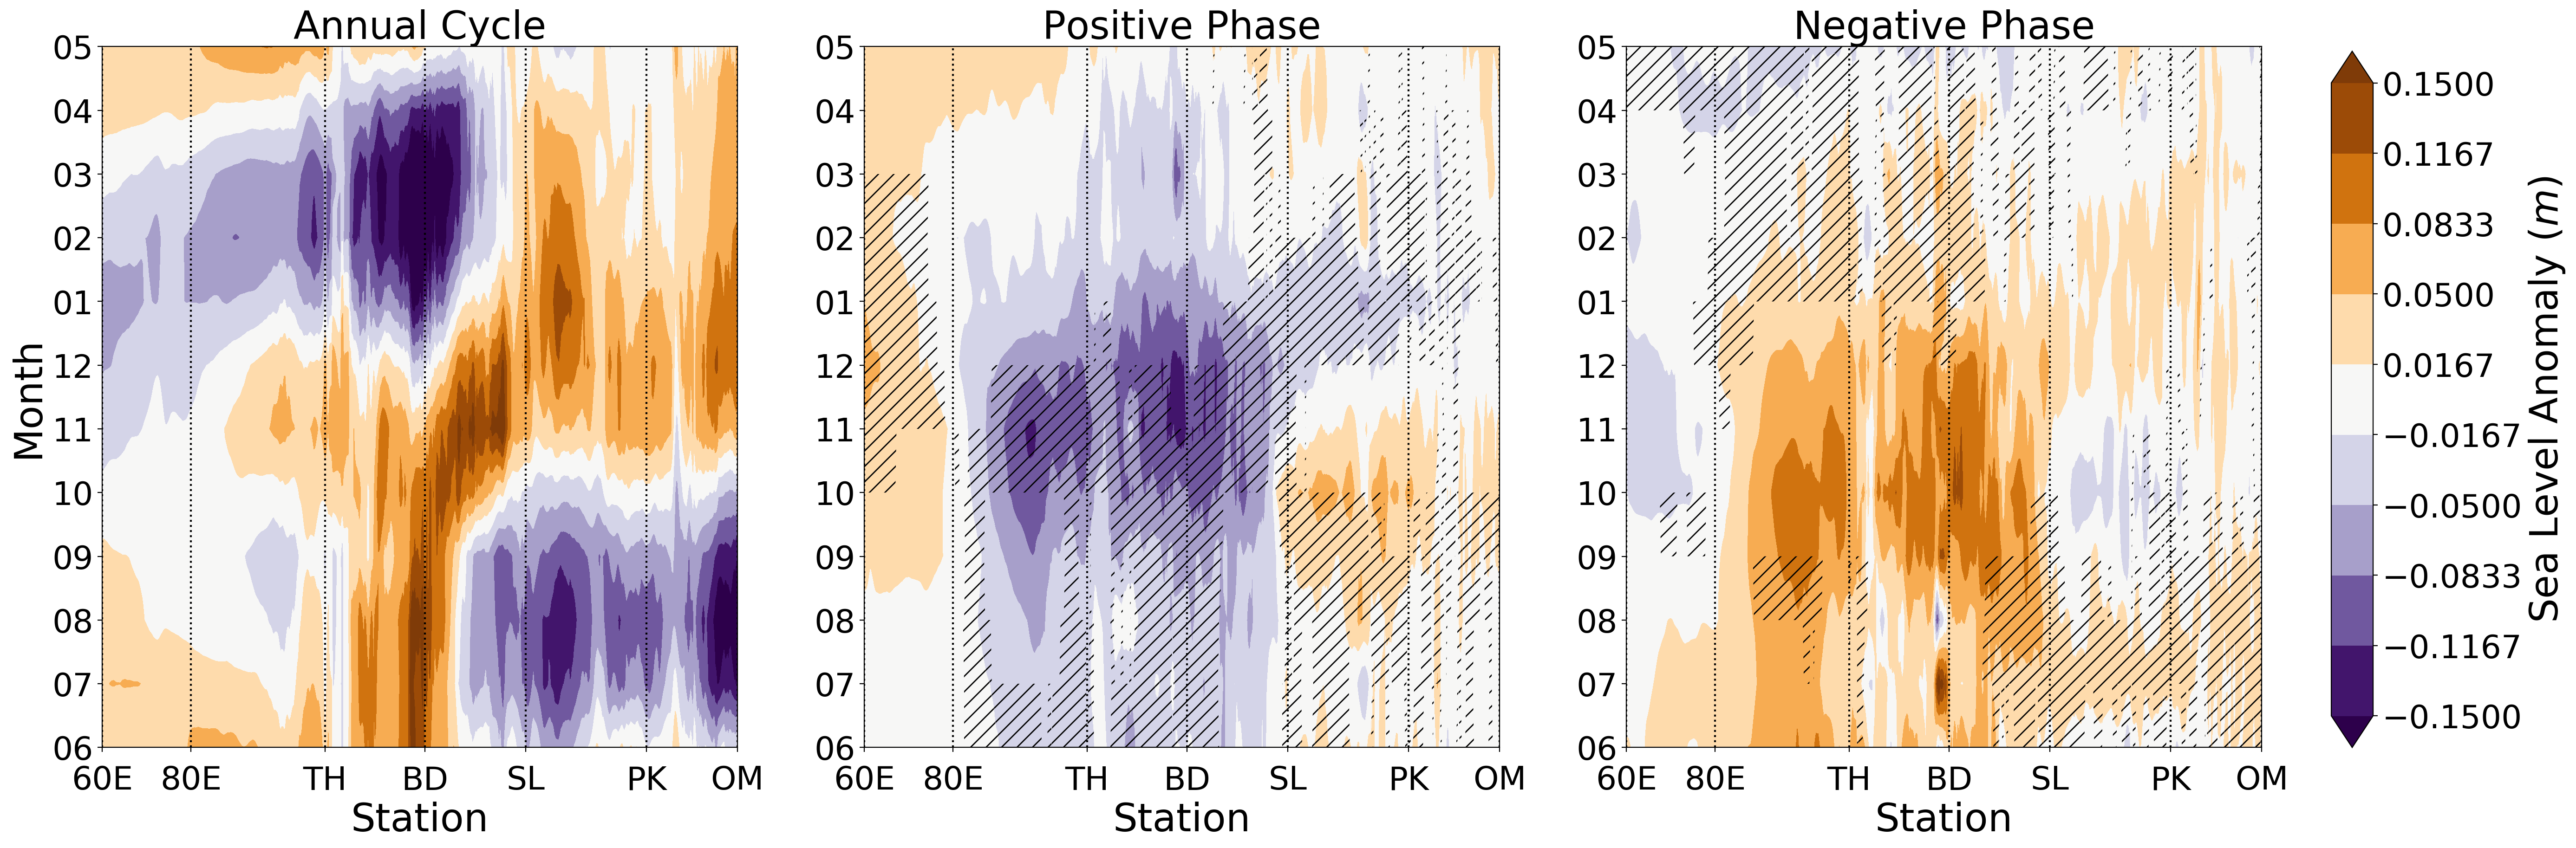

In [9]:
# create list of integer years
IODphases = list([mon_sla_mon_clim,posIOD_mon_sla_mon_anom,negIOD_mon_sla_mon_anom])
titles = ['Annual Cycle','Positive Phase','Negative Phase']
# plt.rcParams.update({'font.size': 20})

fig = plt.figure(figsize=(30, 10), dpi = 200)

cmin = -0.15
cmax = 0.15

params = {'legend.fontsize': 10,
         'axes.labelsize': 30,
         'axes.titlesize': 30,
         'xtick.labelsize':25,
         'ytick.labelsize':25}

pylab.rcParams.update(params)

#########################

for ii,phase in enumerate(IODphases):
    
    # Get times and make array of datetime objects
    vtimes = phase.month
    
    data = np.zeros([vtimes.shape[0],ds_SLA.sta_loninds.shape[0]])
    ac = np.zeros([vtimes.shape[0],ds_SLA.sta_loninds.shape[0]])
    
    for jj in range(ds_SLA.sta_loninds.shape[0]):
        data[:,jj] = phase[:,ds_SLA.sta_latinds[jj],ds_SLA.sta_loninds[jj]]
        ac[:,jj] = mon_sla_mon_clim[:,ds_SLA.sta_latinds[jj],ds_SLA.sta_loninds[jj]]

    # colorbar limits
    levels = np.linspace(cmin, cmax, 10)

    # Specify longitude values for chosen domain
    sta = np.arange(len(ds_SLA.sta_loninds))

    ax = fig.add_subplot(1,3,ii+1)

    # Plot of chosen variable averaged over latitude and slightly smoothed
#     cf = ax.contourf(sta,vtimes,data,levels = levels,cmap=plt.cm.PuOr_r, extend="both")

    cf = ax.contourf(sta,vtimes,data,levels = levels,cmap=plt.cm.PuOr_r, extend="both")
    
    if ii >0:
        ss = np.ma.array(data, mask= np.sign(ac) * np.sign(data)>=0) # maintains opposite condition
        css = ax.contourf(sta,vtimes,ss,levels = levels,cmap=plt.cm.PuOr_r,
                          extend="both", hatches=['//'], alpha=0.5)
    
    for loc in ds_SLA.loc_list:
        plt.axvline(x=loc,color = 'k',linestyle = ':')
        
    plt.xlabel('Station')
    if ii == 0:
        plt.ylabel('Month')
    
    plt.title(titles[ii])
    ax.set_yticklabels(['06','07','08','09','10','11','12','01','02','03', '04', '05'])
    ax.set_xticks(ds_SLA.loc_list)
    ax.set_xticklabels(['60E','80E', 'TH','BD', 'SL', 'PK','OM'])
    ax.tick_params(axis='x', which='major', pad=10)
    ax.set_yticks(list(np.arange(1,13)))
    cf.set_clim(cmin, cmax)# reset lims because contourf does weird things.

cbar_ax = fig.add_axes([0.925, 0.125, 0.015, 0.75])
cbar = fig.colorbar(cf,cax=cbar_ax, pad=0.04)
cbar.set_label('Sea Level Anomaly ($m$)')



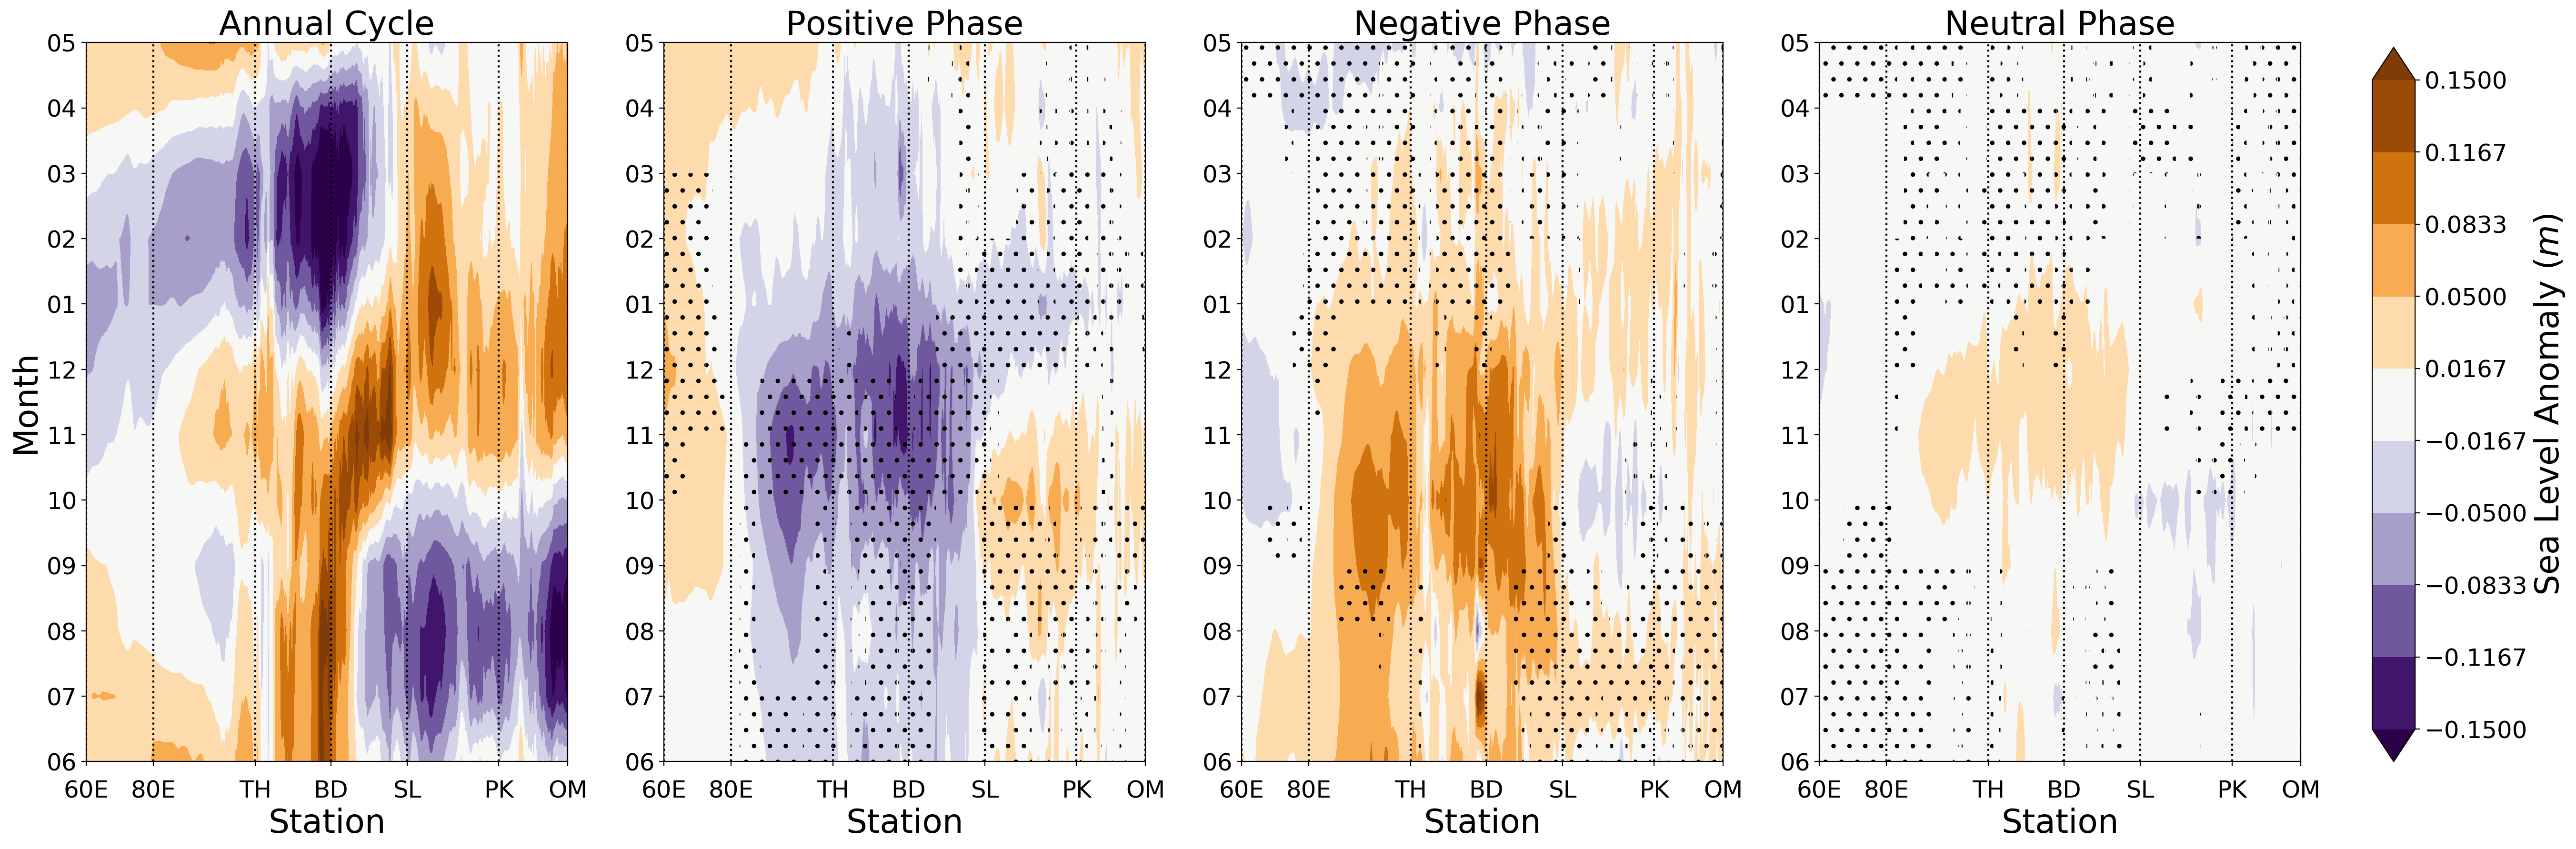

In [10]:
# create list of integer years
IODphases = list([mon_sla_mon_clim,posIOD_mon_sla_mon_anom,negIOD_mon_sla_mon_anom,neuIOD_mon_sla_mon_anom])
titles = ['Annual Cycle','Positive Phase','Negative Phase', 'Neutral Phase']
# plt.rcParams.update({'font.size': 20})

fig = plt.figure(figsize=(30, 10), dpi = 200)

cmin = -0.15
cmax = 0.15

params = {'legend.fontsize': 10,
         'axes.labelsize': 25,
         'axes.titlesize': 25,
         'xtick.labelsize':18,
         'ytick.labelsize':18}

pylab.rcParams.update(params)

#########################

for ii,phase in enumerate(IODphases):
    
    # Get times and make array of datetime objects
    vtimes = phase.month
    
    data = np.zeros([vtimes.shape[0],ds_SLA.sta_loninds.shape[0]])
    ac = np.zeros([vtimes.shape[0],ds_SLA.sta_loninds.shape[0]])
    
    for jj in range(ds_SLA.sta_loninds.shape[0]):
        data[:,jj] = phase[:,ds_SLA.sta_latinds[jj],ds_SLA.sta_loninds[jj]]
        ac[:,jj] = mon_sla_mon_clim[:,ds_SLA.sta_latinds[jj],ds_SLA.sta_loninds[jj]]

    # colorbar limits
    levels = np.linspace(cmin, cmax, 10)

    # Specify longitude values for chosen domain
    sta = np.arange(len(ds_SLA.sta_loninds))

    ax = fig.add_subplot(1,4,ii+1)

    # Plot of chosen variable averaged over latitude and slightly smoothed
#     cf = ax.contourf(sta,vtimes,data,levels = levels,cmap=plt.cm.PuOr_r, extend="both")

    cf = ax.contourf(sta,vtimes,data,levels = levels,cmap=plt.cm.PuOr_r, extend="both")
    
    if ii >0:
        ss = np.ma.array(data, mask= np.sign(ac) * np.sign(data)>=0) # maintains opposite condition
        css = ax.contourf(sta,vtimes,ss,levels = levels,cmap=plt.cm.PuOr_r,
                          extend="both", hatches=['.'], alpha=0.5)
    
    for loc in ds_SLA.loc_list:
        plt.axvline(x=loc,color = 'k',linestyle = ':')
        
    plt.xlabel('Station')
    if ii == 0:
        plt.ylabel('Month')
    
    plt.title(titles[ii])
    ax.set_yticklabels(['06','07','08','09','10','11','12','01','02','03', '04', '05'])
    ax.set_xticks(ds_SLA.loc_list)
    ax.set_xticklabels(['60E','80E', 'TH','BD', 'SL', 'PK','OM'])
    ax.tick_params(axis='x', which='major', pad=10)
    ax.set_yticks(list(np.arange(1,13)))
    cf.set_clim(cmin, cmax)# reset lims because contourf does weird things.

cbar_ax = fig.add_axes([0.925, 0.125, 0.015, 0.75])
cbar = fig.colorbar(cf,cax=cbar_ax, pad=0.04)
cbar.set_label('Sea Level Anomaly ($m$)')




# Combined DMI and Hovemueller

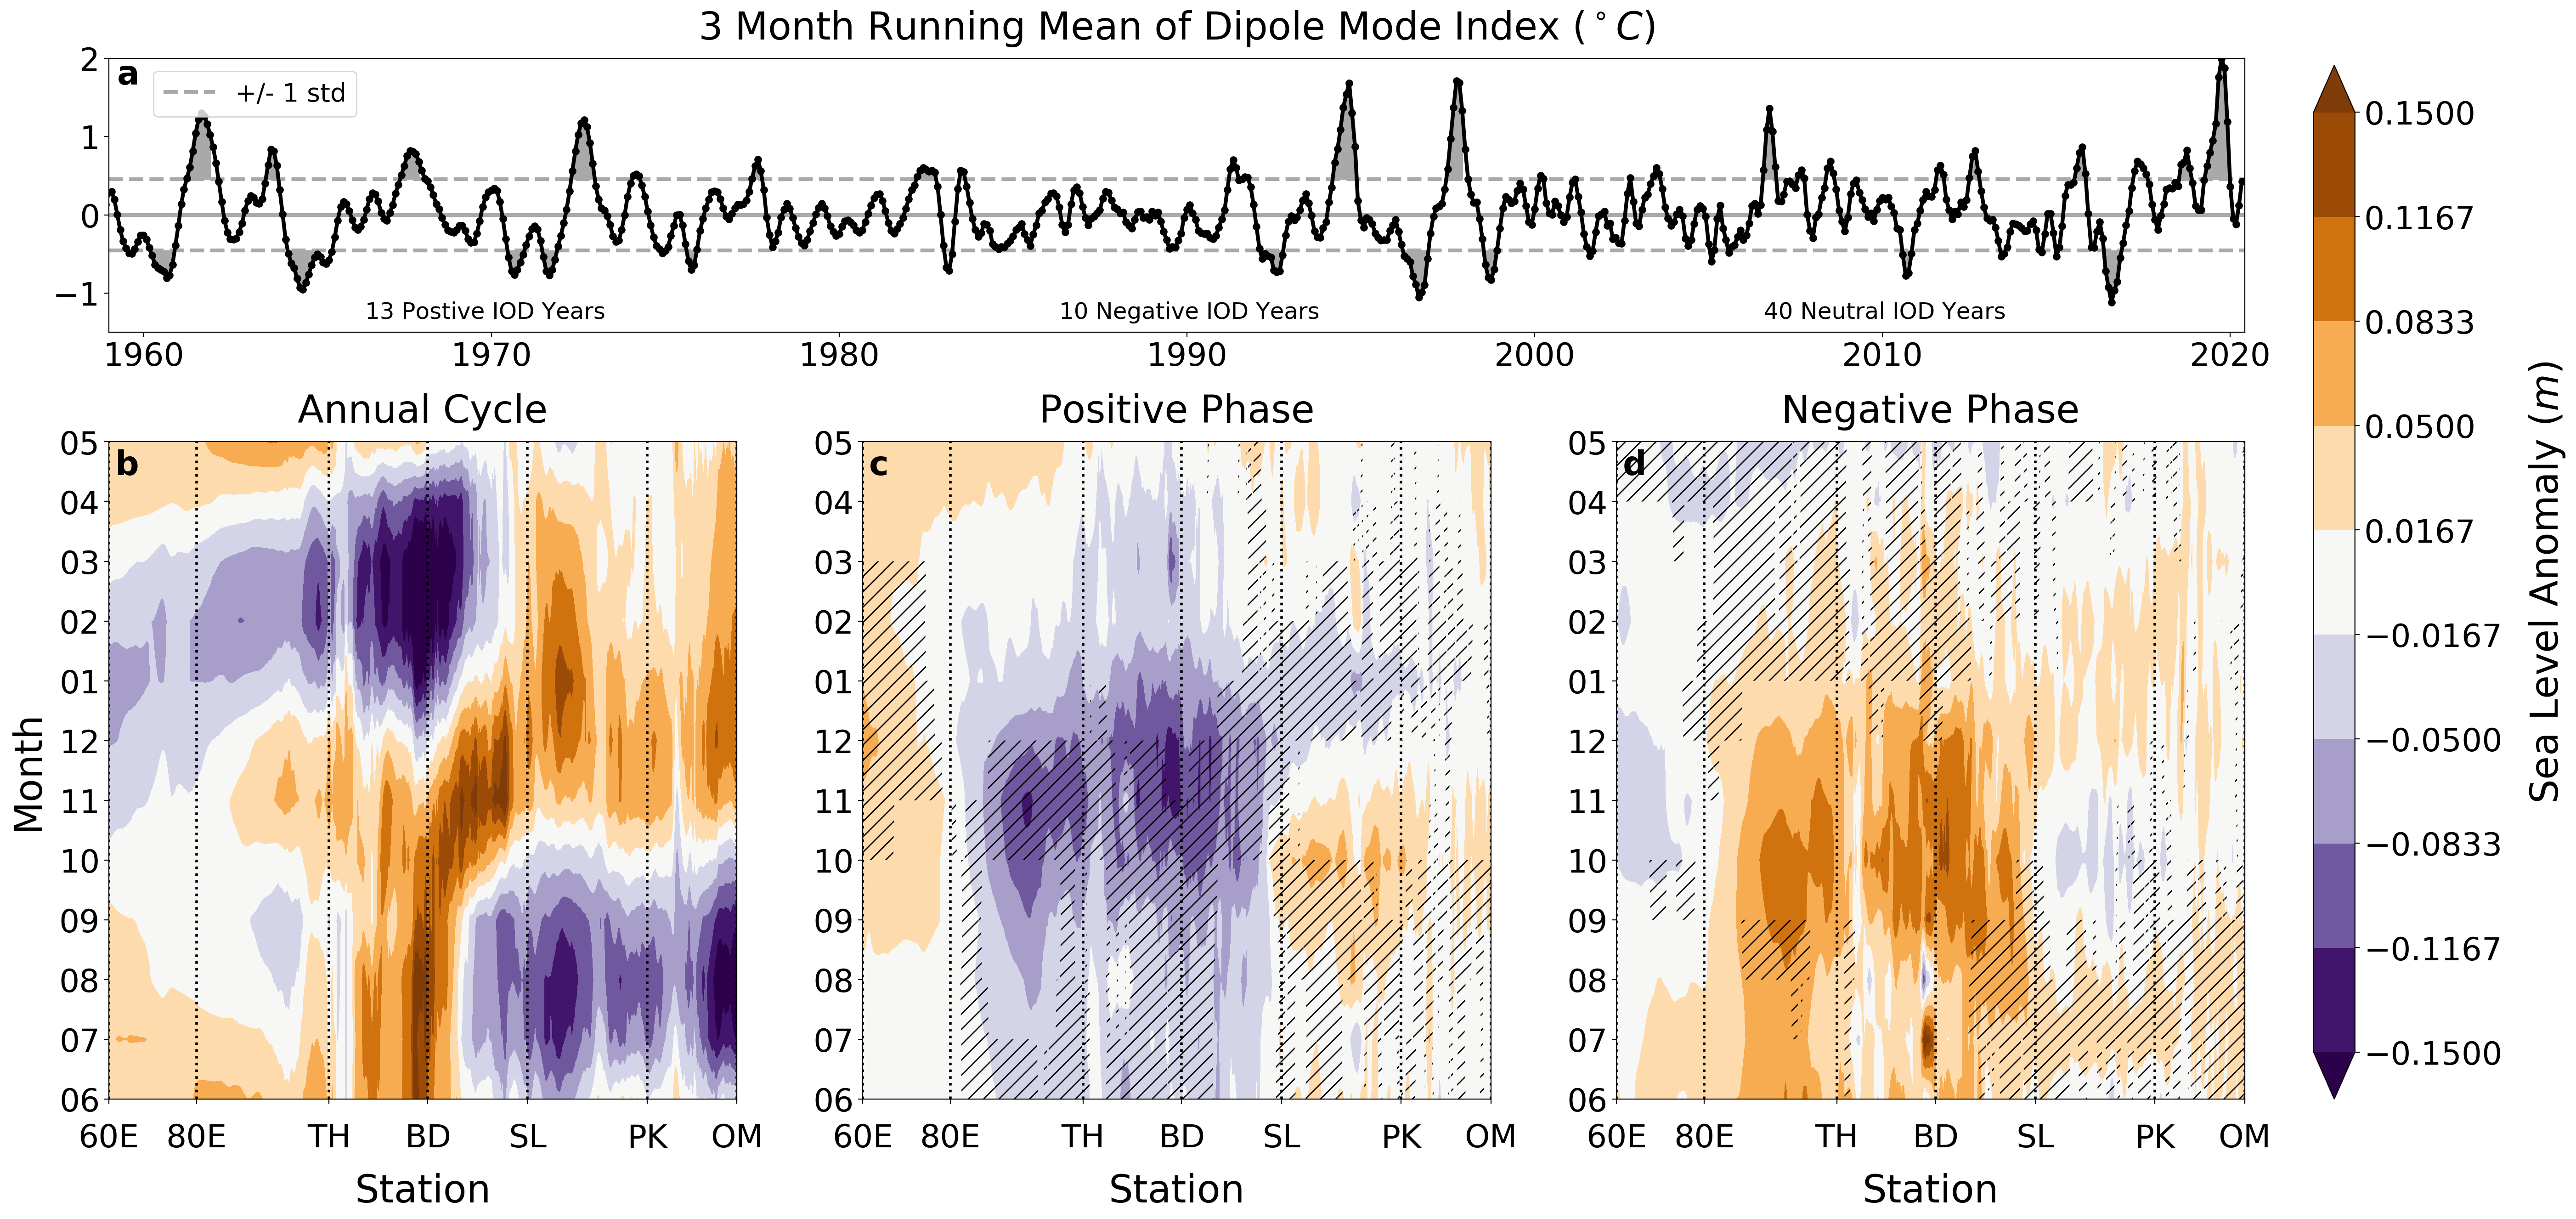

In [11]:
from matplotlib.gridspec import GridSpec
fig = plt.figure(figsize=(30, 15), dpi = 200)
gs = GridSpec(3, 3, figure=fig,hspace = 0.4)

params = {'legend.fontsize': 20,
         'axes.labelsize': 30,
         'axes.titlesize': 30,
         'xtick.labelsize':25,
         'ytick.labelsize':25}

pylab.rcParams.update(params)

letters = ['a','b','c','d']

#########################


# *---------- DMI -----------*

ax1 = fig.add_subplot(gs[0, :])

ax1.axhline(y=0, color='darkgray', linestyle='-', linewidth = 3)
std1 = ax1.axhline(y=ds_DMI.dmi_3mo_runmean.std(), color='darkgray', linestyle='--', linewidth = 3)
ax1.axhline(y=-ds_DMI.dmi_3mo_runmean.std(), color='darkgray', linestyle='--', linewidth = 3)
# std2 = ax1.axhline(y=ds_DMI.dmi_3mo_runmean.std()*2, color='darkgray', linestyle=':', linewidth = 3)
# ax1.axhline(y=-ds_DMI.dmi_3mo_runmean.std()*2, color='darkgray', linestyle=':', linewidth = 3)
ax1.plot(ds_DMI.time,ds_DMI.dmi_3mo_runmean, marker = '.',color='k', linewidth = 3, markersize = 10)

# ax1.axvline(x=dt.date(1993,1,1), color='darkgray', linestyle='-')

for posyear in ds_DMI.pos_IOD_years:
    
    ind = ds_DMI.time.dt.year == posyear
    x = np.array(ds_DMI.time[ind])
    y2 = np.array(ds_DMI.dmi_3mo_runmean.std())
    y1 = np.array(ds_DMI.dmi_3mo_runmean[ind])
    
    ax1.fill_between(x,y1,y2,where=y1 > y2,color = 'darkgray')
    
for negyear in ds_DMI.neg_IOD_years:
    
    ind = ds_DMI.time.dt.year == negyear
    x = np.array(ds_DMI.time[ind])
    y1 = -np.array(ds_DMI.dmi_3mo_runmean.std())
    y2 = np.array(ds_DMI.dmi_3mo_runmean[ind])
    
    ax1.fill_between(x,y1,y2,where=y1 > y2,color = 'darkgray')

add_letter(ax1, letters[0], x = 0.004,y=0.905, fontsize = 26)
add_text(ax1, str(len(ds_DMI.posyears)) + ' Postive IOD Years', x = 0.12,y=0.05, fontsize = 18)
add_text(ax1, str(len(ds_DMI.negyears)) + ' Negative IOD Years', x = 0.445,y=0.05, fontsize = 18)
add_text(ax1, str(len(ds_DMI.neuyears)) + ' Neutral IOD Years', x = 0.775,y=0.05, fontsize = 18)
ax1.set_xlim(dt.date(1959,1,1),dt.date(2020,5,31))
ax1.set_ylim([-1.5,2])
# ax1.set_ylabel('$^\circ C$')
ax1.set_title('3 Month Running Mean of Dipole Mode Index ($^\circ C$)', pad = 15)

l = ax1.legend([std1],['+/- 1 std'],facecolor = 'w', loc = 'upper left', 
               bbox_to_anchor=(0.015, 0.999), ncol = 2)

# *---------- SLA -----------*

IODphases = list([mon_sla_mon_clim,posIOD_mon_sla_mon_anom,negIOD_mon_sla_mon_anom])
titles = ['Annual Cycle','Positive Phase','Negative Phase']

cmin = -0.15
cmax = 0.15

for ii,phase in enumerate(IODphases):
    
    # Get times and make array of datetime objects
    vtimes = phase.month
    
    data = np.zeros([vtimes.shape[0],ds_SLA.sta_loninds.shape[0]])
    ac = np.zeros([vtimes.shape[0],ds_SLA.sta_loninds.shape[0]])
    
    for jj in range(ds_SLA.sta_loninds.shape[0]):
        data[:,jj] = phase[:,ds_SLA.sta_latinds[jj],ds_SLA.sta_loninds[jj]]
        ac[:,jj] = mon_sla_mon_clim[:,ds_SLA.sta_latinds[jj],ds_SLA.sta_loninds[jj]]

    # colorbar limits
    levels = np.linspace(cmin, cmax, 10)

    # Specify longitude values for chosen domain
    sta = np.arange(len(ds_SLA.sta_loninds))

    ax = fig.add_subplot(gs[1:, ii])

    # Plot of chosen variable averaged over latitude and slightly smoothed
#     cf = ax.contourf(sta,vtimes,data,levels = levels,cmap=plt.cm.PuOr_r, extend="both")

    cf = ax.contourf(sta,vtimes,data,levels = levels,cmap=plt.cm.PuOr_r, extend="both")
    
    if ii >0:
        ss = np.ma.array(data, mask= np.sign(ac) * np.sign(data)>=0) # maintains opposite condition
        css = ax.contourf(sta,vtimes,ss,levels = levels,cmap=plt.cm.PuOr_r,
                          extend="both", hatches=['//'], alpha=0.5)
    
    for loc in ds_SLA.loc_list:
        plt.axvline(x=loc,color = 'k',linestyle = ':', linewidth = 2)
        
    plt.xlabel('Station', labelpad = 15)
    
    if ii == 0:
        plt.ylabel('Month', labelpad = 10)
    
    plt.title(titles[ii], pad = 15)
    add_letter(ax, letters[ii+1], x = 0.01,y=0.95, fontsize = 26)
    ax.set_yticklabels(['06','07','08','09','10','11','12','01','02','03', '04', '05'])
    ax.set_xticks(ds_SLA.loc_list)
    ax.set_xticklabels(['60E','80E', 'TH','BD', 'SL', 'PK','OM'])
    ax.tick_params(axis='x', which='major', pad=15)
    ax.set_yticks(list(np.arange(1,13)))
    cf.set_clim(cmin, cmax)# reset lims because contourf does weird things.

cbar_ax = fig.add_axes([0.925, 0.125, 0.015, 0.75])
cbar = fig.colorbar(cf,cax=cbar_ax, pad=0.04)
cbar.set_label('Sea Level Anomaly ($m$)', labelpad = 20)

# Weak and Strong IOD Event

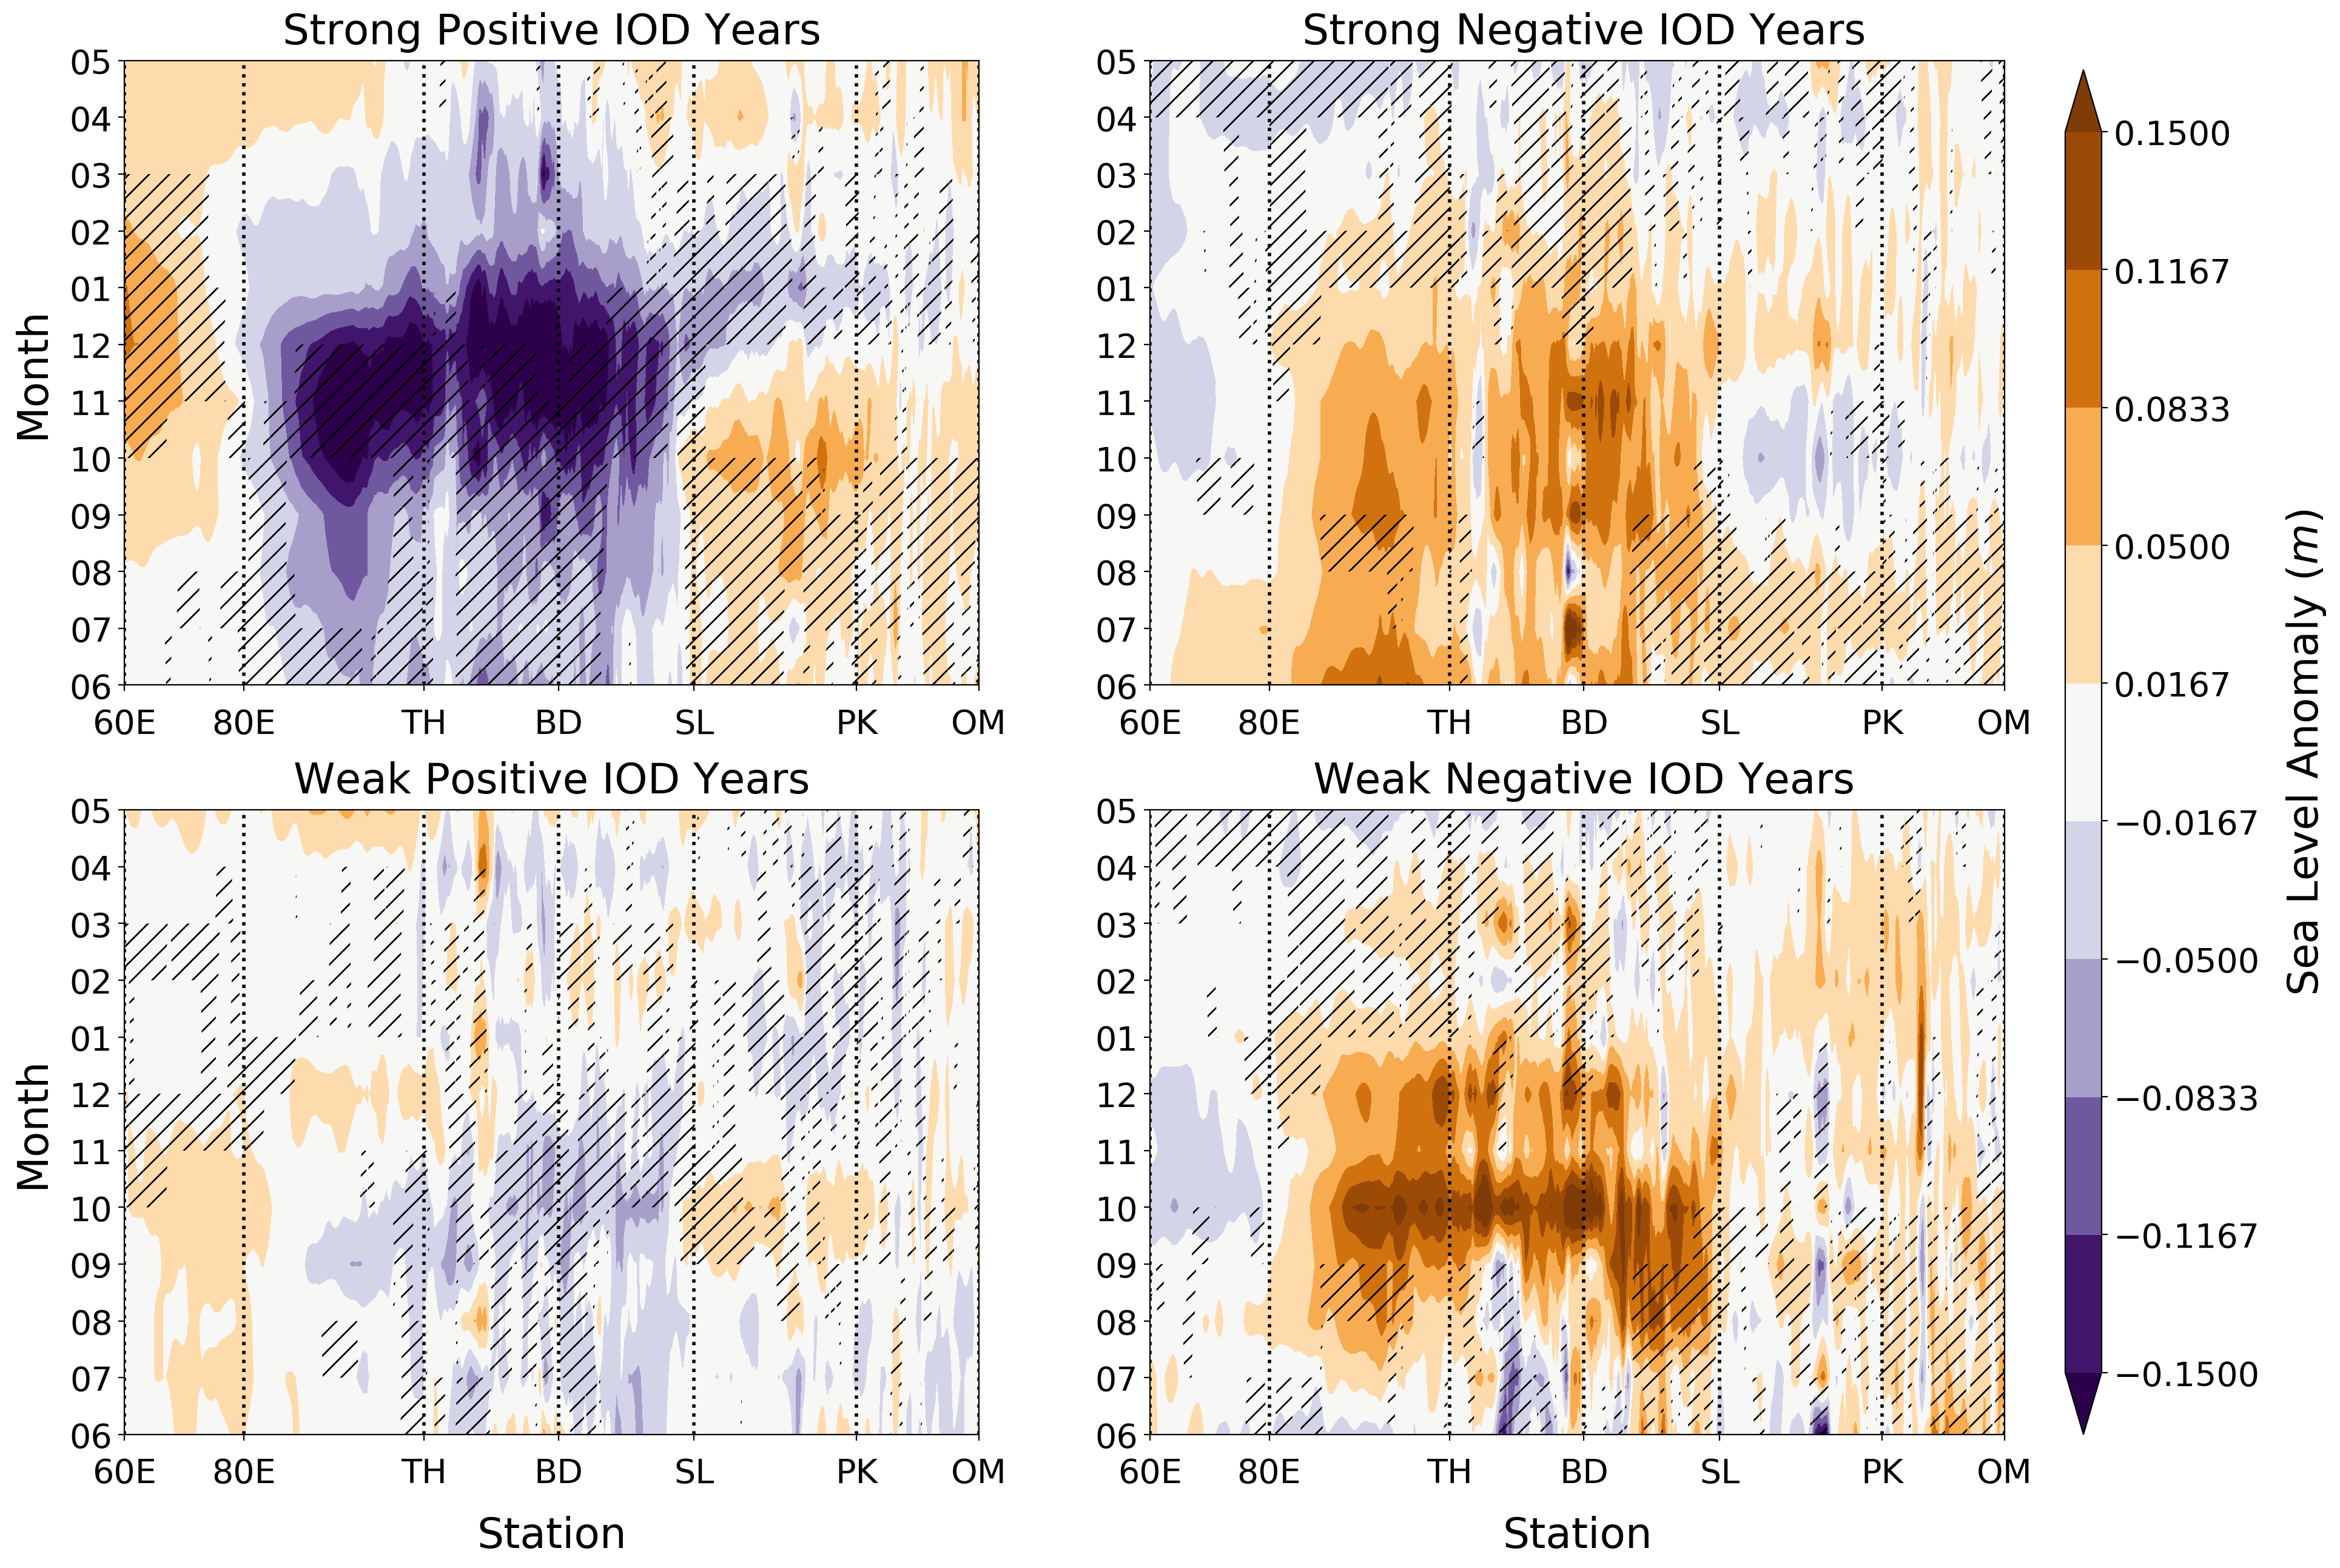

In [13]:
# create list of integer years
IODphases = list([sposIOD_mon_sla_mon_anom,snegIOD_mon_sla_mon_anom,
                 wposIOD_mon_sla_mon_anom,wnegIOD_mon_sla_mon_anom])
titles = ['Strong Positive IOD Years',' Strong Negative IOD Years',
          'Weak Positive IOD Years',' Weak Negative IOD Years']

fig = plt.figure(figsize=(20, 15), dpi = 200)

cmin = -0.15
cmax = 0.15

params = {'legend.fontsize': 15,
         'axes.labelsize': 25,
         'axes.titlesize': 25,
         'xtick.labelsize':20,
         'ytick.labelsize':20}

pylab.rcParams.update(params)

letters = ['a','b','c','d']

#########################
for ii,phase in enumerate(IODphases):
    
    # Get times and make array of datetime objects
    vtimes = phase.month
    
    data = np.zeros([vtimes.shape[0],ds_SLA.sta_loninds.shape[0]])
    ac = np.zeros([vtimes.shape[0],ds_SLA.sta_loninds.shape[0]])
    
    for jj in range(ds_SLA.sta_loninds.shape[0]):
        data[:,jj] = phase[:,ds_SLA.sta_latinds[jj],ds_SLA.sta_loninds[jj]]
        ac[:,jj] = mon_sla_mon_clim[:,ds_SLA.sta_latinds[jj],ds_SLA.sta_loninds[jj]]

    # colorbar limits
    levels = np.linspace(cmin, cmax, 10)

    # Specify longitude values for chosen domain
    sta = np.arange(len(ds_SLA.sta_loninds))

    ax = fig.add_subplot(2,2,ii+1)

    cf = ax.contourf(sta,vtimes,data,levels = levels,cmap=plt.cm.PuOr_r, extend="both")

    ss = np.ma.array(data, mask= np.sign(ac) * np.sign(data)>=0) # maintains opposite condition
    css = ax.contourf(sta,vtimes,ss,levels = levels,cmap=plt.cm.PuOr_r,
                      extend="both", hatches=['//'], alpha=0.5)

    for loc in ds_SLA.loc_list:
        plt.axvline(x=loc,color = 'k',linestyle = ':', linewidth = 2)
    if ii>1:   
        plt.xlabel('Station', labelpad = 10)
    if (ii == 0) | (ii == 2):
        plt.ylabel('Month', labelpad = 10)
    
    plt.title(titles[ii], pad = 10)
    ax.set_yticklabels(['06','07','08','09','10','11','12','01','02','03', '04', '05'])
    ax.set_xticks(ds_SLA.loc_list)
    ax.set_xticklabels(['60E','80E', 'TH','BD', 'SL', 'PK','OM'])
    ax.tick_params(axis='x', which='major', pad=10)
    ax.set_yticks(list(np.arange(1,13)))
    cf.set_clim(cmin, cmax)# reset lims because contourf does weird things.

cbar_ax = fig.add_axes([0.925, 0.125, 0.015, 0.75])
cbar = fig.colorbar(cf,cax=cbar_ax, pad=0.04)
cbar.set_label('Sea Level Anomaly ($m$)', labelpad = 15)


In [9]:
sposIODyears = [1994,1997,2006,2019]
wposIODyears = [2012, 2015, 2018]

# average over the strong positive IOD years -------------------------------------------# 
daily_data = []
mon_data = []
mon_clim = []
# for ii,year in enumerate(list(np.array(ds_DMI.pos_IOD_years))):
for ii,year in enumerate(sposIODyears):
    start_time = str(year) + '-06-01'
    end_time = str(year+1) + '-05-31'
    time_slice = slice(start_time, end_time)
    mon_data.append(mon_sla_mon_anom.sel(month_time=time_slice))

# add all the data together
sposIOD_mon_sla_mon_anom= xr.concat(mon_data, dim='month_time')
# take the mean for each month of all the years
sposIOD_mon_sla_mon_anom = sposIOD_mon_sla_mon_anom.groupby('month_time.month').mean(dim='month_time')
#start in march instead of 01
sposIOD_mon_sla_mon_anom = sposIOD_mon_sla_mon_anom.roll(month=-5,roll_coords = False)

# average over the weak positive IOD years -------------------------------------------# 
daily_data = []
mon_data = []
mon_clim = []
# for ii,year in enumerate(list(np.array(ds_DMI.pos_IOD_years))):
for ii,year in enumerate(wposIODyears):
    start_time = str(year) + '-06-01'
    end_time = str(year+1) + '-05-31'
    time_slice = slice(start_time, end_time)
    mon_data.append(mon_sla_mon_anom_dtrnd.sel(month_time=time_slice))

# add all the data together
wposIOD_mon_sla_mon_anom_dtrnd = xr.concat(mon_data, dim='month_time')
# take the mean for each month of all the years
wposIOD_mon_sla_mon_anom_dtrnd = wposIOD_mon_sla_mon_anom_dtrnd.groupby('month_time.month').mean(dim='month_time')
#start in march instead of 01
wposIOD_mon_sla_mon_anom_dtrnd = wposIOD_mon_sla_mon_anom_dtrnd.roll(month=-5,roll_coords = False)


snegIODyears = [1996]
wnegIODyears = [1996,1998,2016]


# average over the strong negative IOD years -------------------------------------------# 
daily_data = []
mon_data = []
mon_clim = []
# for ii,year in enumerate(list(np.array(ds_DMI.pos_IOD_years))):
for ii,year in enumerate(snegIODyears):
    start_time = str(year) + '-06-01'
    end_time = str(year+1) + '-05-31'
    time_slice = slice(start_time, end_time)
    mon_data.append(mon_sla_mon_anom_dtrnd.sel(month_time=time_slice))

# add all the data together
snegIOD_mon_sla_mon_anom_dtrnd = xr.concat(mon_data, dim='month_time')
# take the mean for each month of all the years
snegIOD_mon_sla_mon_anom_dtrnd = snegIOD_mon_sla_mon_anom_dtrnd.groupby('month_time.month').mean(dim='month_time')
#start in march instead of 01
snegIOD_mon_sla_mon_anom_dtrnd = snegIOD_mon_sla_mon_anom_dtrnd.roll(month=-5,roll_coords = False)

# average over the weak negative IOD years -------------------------------------------# 
daily_data = []
mon_data = []
mon_clim = []
# for ii,year in enumerate(list(np.array(ds_DMI.pos_IOD_years))):
for ii,year in enumerate(wnegIODyears):
    start_time = str(year) + '-06-01'
    end_time = str(year+1) + '-05-31'
    time_slice = slice(start_time, end_time)
    mon_data.append(mon_sla_mon_anom_dtrnd.sel(month_time=time_slice))

# add all the data together
wnegIOD_mon_sla_mon_anom_dtrnd = xr.concat(mon_data, dim='month_time')
# take the mean for each month of all the years
wnegIOD_mon_sla_mon_anom_dtrnd = wnegIOD_mon_sla_mon_anom_dtrnd.groupby('month_time.month').mean(dim='month_time')
#start in march instead of 01
wnegIOD_mon_sla_mon_anom_dtrnd = wnegIOD_mon_sla_mon_anom_dtrnd.roll(month=-5,roll_coords = False)

NameError: name 'mon_sla_mon_anom_dtrnd' is not defined

In [10]:
# create list of integer years
IODphases = list([sposIOD_mon_sla_mon_anom_dtrnd,snegIOD_mon_sla_mon_anom_dtrnd,
                 wposIOD_mon_sla_mon_anom_dtrnd,wnegIOD_mon_sla_mon_anom_dtrnd])
titles = ['Strong Positive Phase',' Strong Negative Phase','Weak Positive Phase',' Weak Negative Phase']
plt.rcParams.update({'font.size': 20})

cmin = -0.15
cmax = 0.15

fig = plt.figure(figsize=(20, 20))
for ii,phase in enumerate(IODphases):
    
    # Get times and make array of datetime objects
    vtimes = phase.month
    
    data = np.zeros([vtimes.shape[0],sta_loninds.shape[0]])
#     print(data.shape)
    for jj in range(sta_loninds.shape[0]):
        data[:,jj] = phase[:,sta_latinds[jj],sta_loninds[jj]]

    # colorbar limits
    levels = np.linspace(cmin, cmax, 10)

    # Specify longitude values for chosen domain
    sta = np.arange(len(sta_loninds))

    ax = fig.add_subplot(2,2,ii+1)

    # Plot of chosen variable averaged over latitude and slightly smoothed
    cf = ax.contourf(sta,vtimes,data,levels = levels,cmap=plt.cm.PuOr_r, extend="both")
    for loc in loc_list:
        plt.axvline(x=loc,color = 'k',linestyle = ':')
        
    plt.xlabel('Station')
    if ii == 0:
        plt.ylabel('Month')
    
    plt.title(titles[ii])
    ax.set_yticklabels(['06','07','08','09','10','11','12','01','02','03', '04', '05'])
    ax.set_xticks(loc_list)
    ax.set_xticklabels(['60E','80E', 'sBoB','mBoB', 'SL', 'mAS','eAS'])
    ax.set_yticks(list(np.arange(1,13)))
    cf.set_clim(cmin, cmax)# reset lims because contourf does weird things.

cbar_ax = fig.add_axes([0.925, 0.125, 0.02, 0.75])
cbar = fig.colorbar(cf,cax=cbar_ax, pad=0.04)
cbar.set_label('Sea Level Anomaly ($m$)')

plt.savefig('../figures/strong-and-weak-IOD-years-SLA-along-coast.png', dpi=200, bbox_inches='tight')


NameError: name 'sposIOD_mon_sla_mon_anom_dtrnd' is not defined

In [11]:
# create list of integer years
IODphases = list([rolled_ann_cyc,sposIOD_mon_sla_mon_anom_dtrnd,snegIOD_mon_sla_mon_anom_dtrnd])
titles = ['Annual Cycle','Strong Positive Phase + AC',' Strong Negative Phase + AC']
plt.rcParams.update({'font.size': 20})

cmin = -0.3
cmax = 0.3

fig = plt.figure(figsize=(30, 12))
for ii,phase in enumerate(IODphases):
    
    if ii == 0:
        var = rolled_ann_cyc
    else:
        var = rolled_ann_cyc + phase
        
    # Get times and make array of datetime objects
    vtimes = phase.month
    
    data = np.zeros([vtimes.shape[0],sta_loninds.shape[0]])
#     print(data.shape)
    for jj in range(sta_loninds.shape[0]):
        data[:,jj] = var[:,sta_latinds[jj],sta_loninds[jj]]

    # colorbar limits
    levels = np.linspace(cmin, cmax, 10)

    # Specify longitude values for chosen domain
    sta = np.arange(len(sta_loninds))

    ax = fig.add_subplot(1,3,ii+1)

    # Plot of chosen variable averaged over latitude and slightly smoothed
    cf = ax.contourf(sta,vtimes,data,levels = levels,cmap=plt.cm.PuOr_r, extend="both")
    for loc in loc_list:
        plt.axvline(x=loc,color = 'k',linestyle = ':')
        
    plt.xlabel('Station')
    if ii == 0:
        plt.ylabel('Month')
    
    plt.title(titles[ii])
    ax.set_yticklabels(['06','07','08','09','10','11','12','01','02','03', '04', '05'])
    ax.set_xticks(loc_list)
    ax.set_xticklabels(['60E','80E', 'sBoB','mBoB', 'SL', 'mAS','eAS'])
    ax.set_yticks(list(np.arange(1,13)))
    cf.set_clim(cmin, cmax)# reset lims because contourf does weird things.

cbar_ax = fig.add_axes([0.925, 0.125, 0.02, 0.75])
cbar = fig.colorbar(cf,cax=cbar_ax, pad=0.04)
cbar.set_label('Sea Level Anomaly ($m$)')

plt.savefig('../figures/strong-and-weak-IOD-years-add-SLA-along-coast.png', dpi=200, bbox_inches='tight')



NameError: name 'sposIOD_mon_sla_mon_anom_dtrnd' is not defined

In [12]:
# create list of integer years
IODphases = list([rolled_ann_cyc,sposIOD_mon_sla_mon_anom_dtrnd,snegIOD_mon_sla_mon_anom_dtrnd])
titles = ['Annual Cycle','Strong Positive Phase + AC',' Strong Negative Phase + AC']
plt.rcParams.update({'font.size': 20})

cmin = -0.3
cmax = 0.3

fig = plt.figure(figsize=(30, 12))
for ii,phase in enumerate(IODphases):
    
    if ii == 0:
        var = rolled_ann_cyc
    else:
        var = rolled_ann_cyc + phase
    
    # Get times and make array of datetime objects
    vtimes = phase.month
    
    data = np.zeros([vtimes.shape[0],sta_loninds.shape[0]])
    ac = np.zeros([vtimes.shape[0],sta_loninds.shape[0]])
    ph = np.zeros([vtimes.shape[0],sta_loninds.shape[0]])
    
#     print(data.shape)
    for jj in range(sta_loninds.shape[0]):
        data[:,jj] = var[:,sta_latinds[jj],sta_loninds[jj]]
        ac[:,jj] = rolled_ann_cyc[:,sta_latinds[jj],sta_loninds[jj]]
        ph[:,jj] = phase[:,sta_latinds[jj],sta_loninds[jj]]

    # colorbar limits
    levels = np.linspace(cmin, cmax, 10)

    # Specify longitude values for chosen domain
    sta = np.arange(len(sta_loninds))

    ax = fig.add_subplot(1,3,ii+1)

    # Plot of chosen variable averaged over latitude and slightly smoothed
    cf = ax.contourf(sta,vtimes,data,levels = levels,cmap=plt.cm.PuOr_r, extend="both")
    ss = np.ma.array(data, mask= np.sign(ac) * np.sign(ph)<=0) # maintains opposite condition
#     os = np.ma.array(data, mask= np.sign(ac) * np.sign(ph)>0)
    
    if ii >0:
        css = ax.contourf(sta,vtimes,ss,levels = levels,cmap=plt.cm.PuOr_r,
                          extend="both", hatches=['.'], alpha=0.5)
#         cos = ax.contourf(sta,vtimes,os,levels = levels,cmap=plt.cm.PuOr_r,
#                           extend="both", hatches=['/'], alpha=0.5)
#         xsta, ytime = np.meshgrid(sta,vtimes)
#         xsta = np.ma.array(xsta, mask= ((np.sign(ac) * np.sign(ph)<=0) | (ph == np.nan)))
#         ytime = np.ma.array(ytime, mask= ((np.sign(ac) * np.sign(ph)<=0) | (ph == np.nan)))
#         plt.scatter(xsta.flatten(),ytime.flatten(), marker = '.', c = 'k', s = 10)
    
    for loc in loc_list:
        plt.axvline(x=loc,color = 'k',linestyle = ':')
        
    plt.xlabel('Station')
    if ii == 0:
        plt.ylabel('Month')
    
    plt.title(titles[ii])
    ax.set_yticklabels(['06','07','08','09','10','11','12','01','02','03', '04', '05'])
    ax.set_xticks(loc_list)
    ax.set_xticklabels(['60E','80E', 'sBoB','mBoB', 'SL', 'mAS','eAS'])
    ax.set_yticks(list(np.arange(1,13)))
    plt.xlim(0,len(sta))
    plt.ylim(1,12)
    cf.set_clim(cmin, cmax)# reset lims because contourf does weird things.

cbar_ax = fig.add_axes([0.925, 0.125, 0.02, 0.75])
cbar = fig.colorbar(cf,cax=cbar_ax, pad=0.04)
cbar.set_label('Sea Level Anomaly ($m$)')

plt.savefig('../figures/seasonal-and-IOD-years-add-SLA-along-coast-0-25-degree.png', dpi=200, bbox_inches='tight')





NameError: name 'sposIOD_mon_sla_mon_anom_dtrnd' is not defined

In [68]:
# # singular plots 
# # create list of integer years
# rolled_ann_cyc = sla_mon_clim_dtrnd.roll(month=-5,roll_coords = False)
# IODphases = list([rolled_ann_cyc,posIOD_mon_sla_mon_anom_dtrnd,negIOD_mon_sla_mon_anom_dtrnd,neuIOD_mon_sla_mon_anom_dtrnd])
# titles = ['Annual Cycle','Positive Phase','Negative Phase', 'Neutral Phase']
# titles_save = ['annual-cycle','positive-phase','negative-phase', 'neutral-phase']
# plt.rcParams.update({'font.size': 20})

# cmin = -0.15
# cmax = 0.15

# for ii,phase in enumerate(IODphases):
    
#     fig = plt.figure(figsize=(14, 18))
    
#     # Get times and make array of datetime objects
#     vtimes = phase.month
    
#     data = np.zeros([vtimes.shape[0],sta_loninds.shape[0]])
#     ac = np.zeros([vtimes.shape[0],sta_loninds.shape[0]])
    
#     for jj in range(sta_loninds.shape[0]):
#         data[:,jj] = phase[:,sta_latinds[jj],sta_loninds[jj]]

#     # colorbar limits
#     levels = np.linspace(cmin, cmax, 10)

#     # Specify longitude values for chosen domain
#     sta = np.arange(len(sta_loninds))

#     ax = fig.add_subplot(1,1,1)

#     # Plot of chosen variable averaged over latitude and slightly smoothed
#     cf = ax.contourf(sta,vtimes,data,levels = levels,cmap=plt.cm.PuOr_r, extend="both")
    
#     for loc in loc_list:
#         plt.axvline(x=loc,color = 'k',linestyle = ':')
        
#     plt.xlabel('Station')
#     if ii == 0:
#         plt.ylabel('Month')
    
#     plt.title(titles[ii])
#     ax.set_yticklabels(['06','07','08','09','10','11','12','01','02','03', '04', '05'])
#     ax.set_xticks(loc_list)
#     ax.set_xticklabels(['60E','80E', 'sBoB','mBoB', 'SL', 'mAS','eAS'])
#     ax.set_yticks(list(np.arange(1,13)))
#     cf.set_clim(cmin, cmax)# reset lims because contourf does weird things.

#     cbar_ax = fig.add_axes([0.925, 0.125, 0.02, 0.75])
#     cbar = fig.colorbar(cf,cax=cbar_ax, pad=0.04)
#     cbar.set_label('Interannual Sea Level Anomaly ($m$)')




NameError: name 'sla_mon_clim_dtrnd' is not defined

# Seasonal Cycle

In [13]:
ds_SLA.sla_seas_clim_dtrnd.season

<xarray.DataArray 'season' (season: 4)>
array(['DJF', 'JJA', 'MAM', 'SON'], dtype=object)
Coordinates:
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'

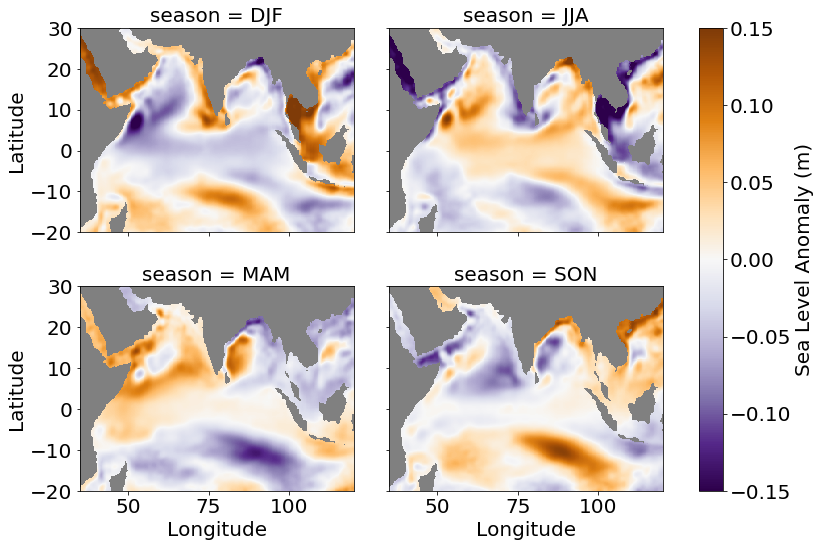

In [14]:
seasona = ['JJA','MAM','SON','DJF']

rolled_seas_cycle = ds_SLA.sla_seas_clim_dtrnd.roll(season=-1,roll_coords = False)
p = ds_SLA.sla_seas_clim_dtrnd.plot.pcolormesh(x="longitude", y="latitude", col="season", col_wrap=2,
                                        cmap="PuOr_r",
                                        vmax=0.15,vmin=-0.15, # set colorbar lims
                                        extend = 'neither', # make a box colorbar rather than pointed
                                        figsize = (12, 8),
                                        cbar_kwargs={"label": "Sea Level Anomaly (m)"},
                                        subplot_kws={'facecolor': 'gray'}
                                       )

for i, ax in enumerate(p.axes.flat):
#     ax.set_title(months[i])
    ax.axes.axis('tight')
#     plt.subplots_adjust(top=.9)

p.set_xlabels('Longitude')
p.set_ylabels('Latitude')
plt.savefig('../figures/seasonal-cycle-SLA.png', dpi=300, bbox_inches='tight')

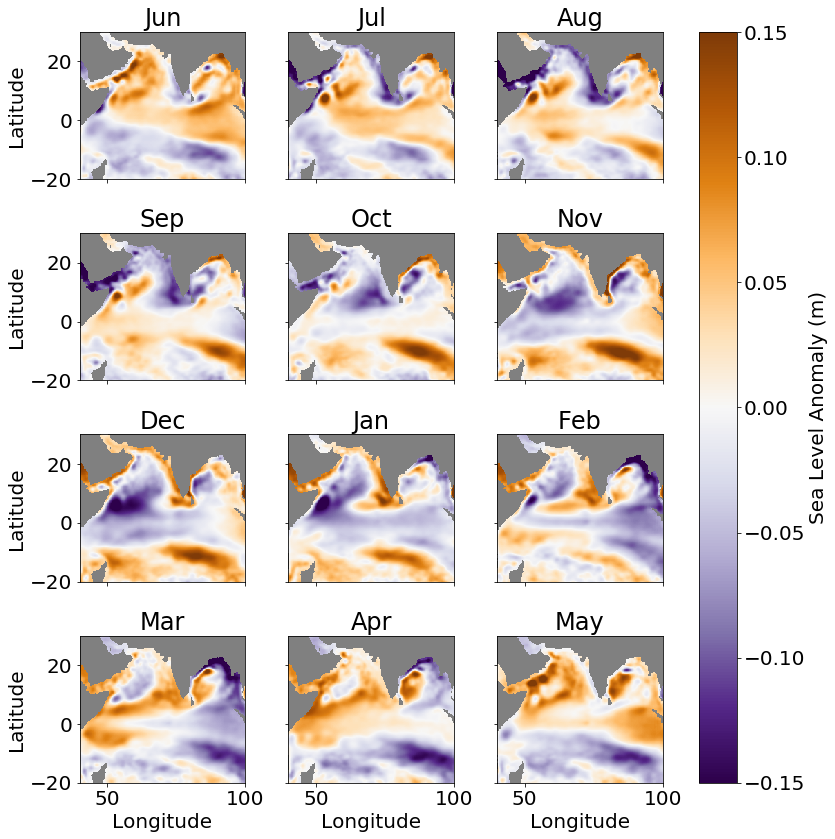

In [15]:
months = ['Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr','May']

p = rolled_ann_cyc.plot.pcolormesh(x="longitude", y="latitude", col="month", col_wrap=3,
                                        cmap="PuOr_r",
                                        vmax=0.15,vmin=-0.15, # set colorbar lims
                                        extend = 'neither', # make a box colorbar rather than pointed
                                        figsize = (12, 12),
                                        cbar_kwargs={"label": "Sea Level Anomaly (m)"},
                                        subplot_kws={'facecolor': 'gray'}
                                       )

for i, ax in enumerate(p.axes.flat):
    ax.set_title(months[i])
    ax.axes.axis('tight')
#     plt.subplots_adjust(top=.9)

p.set_xlabels('Longitude')
p.set_ylabels('Latitude')
plt.savefig('../figures/annual-cycle-SLA.png', dpi=300, bbox_inches='tight')

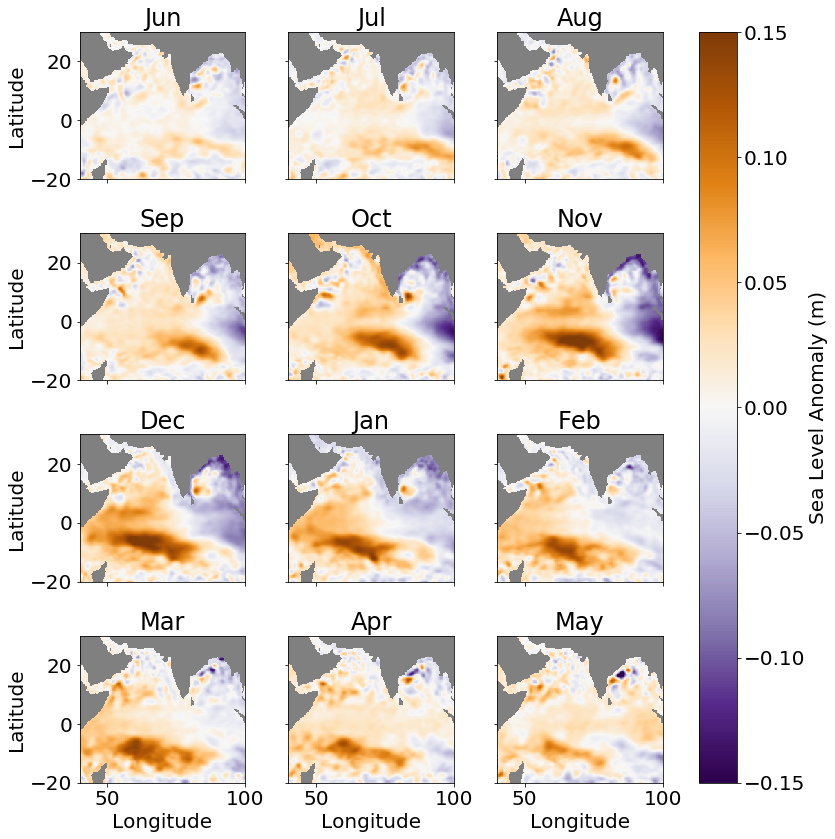

In [16]:
# posIOD
months = ['Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr','May']

p = posIOD_mon_sla_mon_anom_dtrnd.plot.pcolormesh(x="longitude", y="latitude", col="month", col_wrap=3,
                                        cmap="PuOr_r",
                                        vmax=0.15,vmin=-0.15, # set colorbar lims
                                        extend = 'neither', # make a box colorbar rather than pointed
                                        figsize = (12, 12),
                                        cbar_kwargs={"label": "Sea Level Anomaly (m)"},
                                        subplot_kws={'facecolor': 'gray'}
                                       )

for i, ax in enumerate(p.axes.flat):
    ax.set_title(months[i])
    ax.axes.axis('tight')
#     plt.subplots_adjust(top=.9)

p.set_xlabels('Longitude')
p.set_ylabels('Latitude')

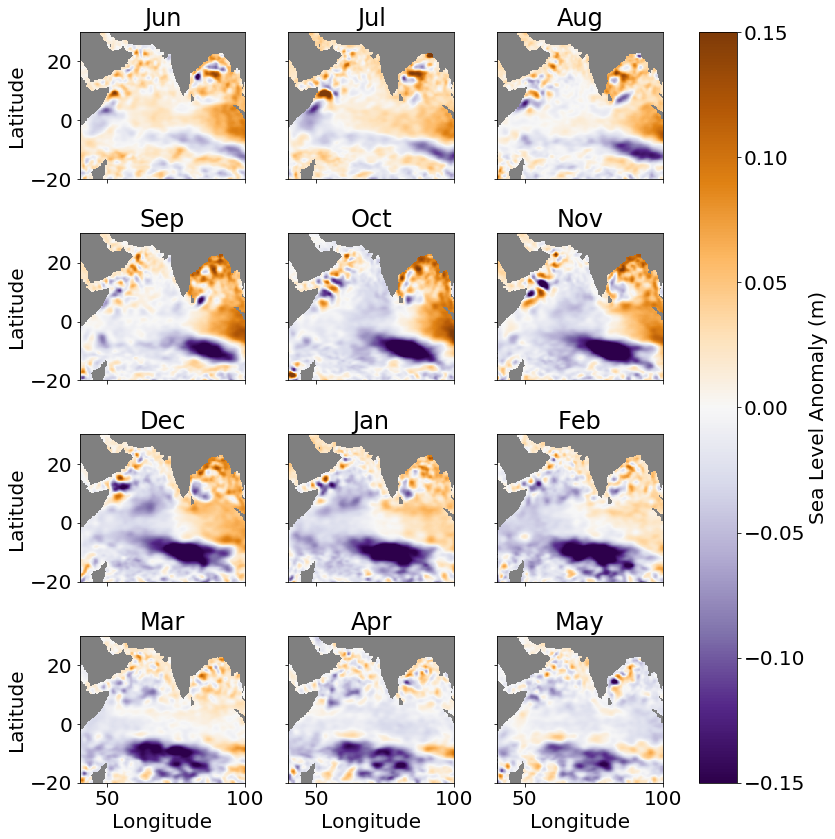

In [17]:
# negIOD
months = ['Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr','May',]

p = negIOD_mon_sla_mon_anom_dtrnd.plot.pcolormesh(x="longitude", y="latitude", col="month", col_wrap=3,
                                        cmap="PuOr_r",
                                        vmax=0.15,vmin=-0.15, # set colorbar lims
                                        extend = 'neither', # make a box colorbar rather than pointed
                                        figsize = (12, 12),
                                        cbar_kwargs={"label": "Sea Level Anomaly (m)"},
                                        subplot_kws={'facecolor': 'gray'}
                                       )

for i, ax in enumerate(p.axes.flat):
    ax.set_title(months[i])
    ax.axes.axis('tight')
#     plt.subplots_adjust(top=.9)

p.set_xlabels('Longitude')
p.set_ylabels('Latitude')

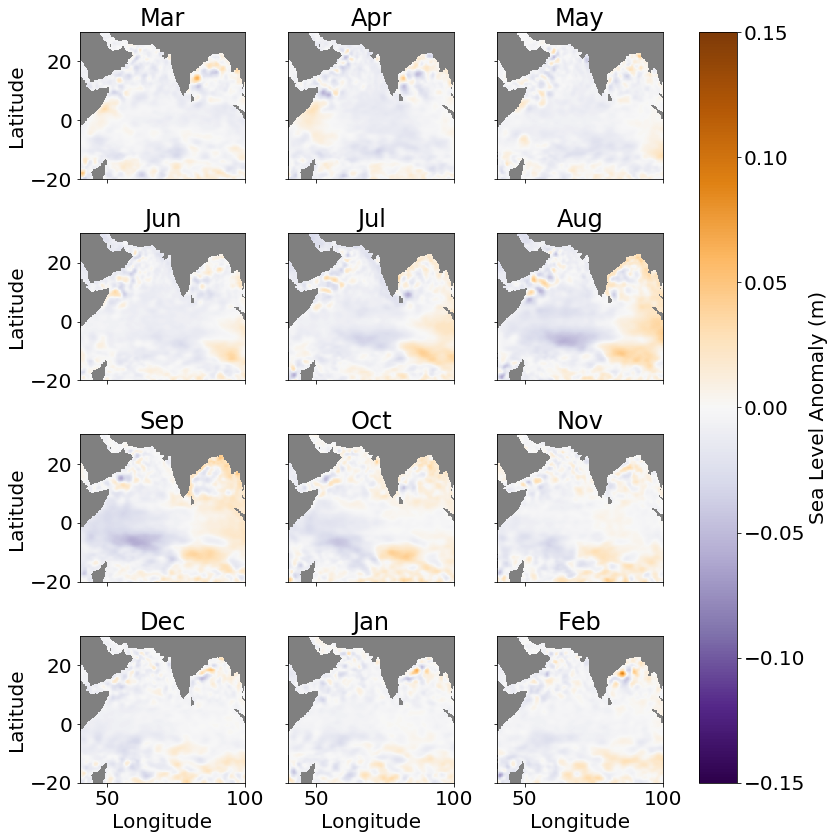

In [18]:
# neuIOD
months = ['Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb']

p = neuIOD_mon_sla_mon_anom_dtrnd.plot.pcolormesh(x="longitude", y="latitude", col="month", col_wrap=3,
                                        cmap="PuOr_r",
                                        vmax=0.15,vmin=-0.15, # set colorbar lims
                                        extend = 'neither', # make a box colorbar rather than pointed
                                        figsize = (12, 12),
                                        cbar_kwargs={"label": "Sea Level Anomaly (m)"},
                                        subplot_kws={'facecolor': 'gray'}
                                       )

for i, ax in enumerate(p.axes.flat):
    ax.set_title(months[i])
    ax.axes.axis('tight')
#     plt.subplots_adjust(top=.9)

p.set_xlabels('Longitude')
p.set_ylabels('Latitude')

# Differences between annual cycle and positive IOD years

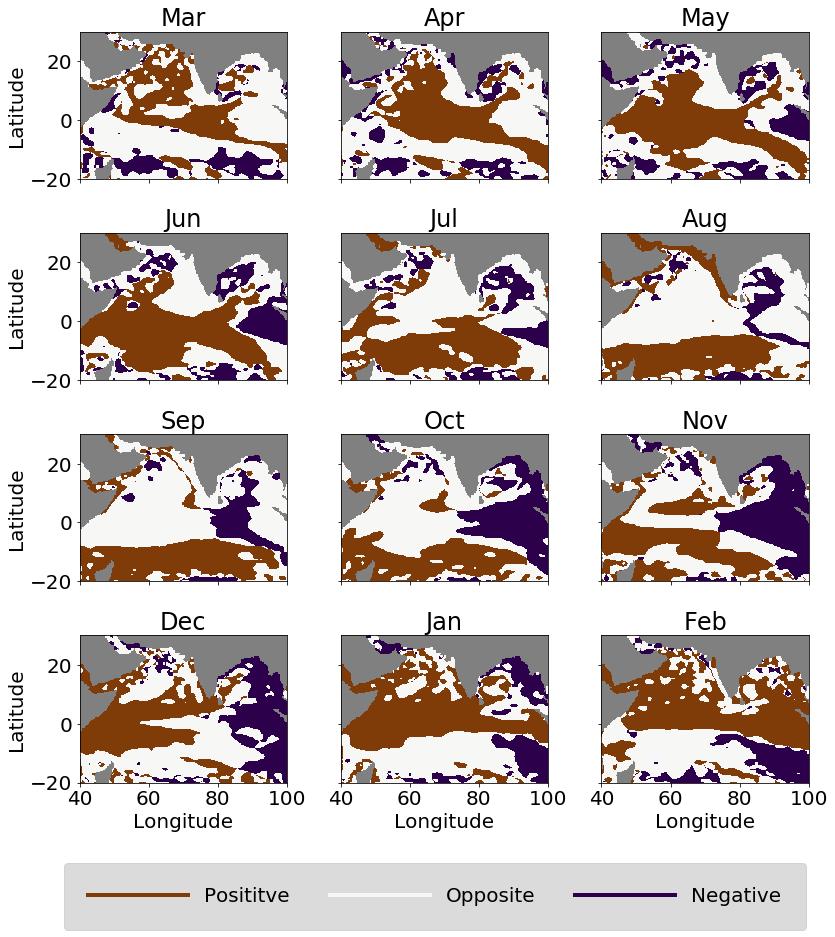

In [19]:
# posIOD

var = np.sign(posIOD_mon_sla_mon_anom_dtrnd) + np.sign(rolled_ann_cyc)
months = ['Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb']

p = var.plot.pcolormesh(x="longitude", y="latitude", col="month", col_wrap=3,
                                        cmap="PuOr_r",
                                        add_colorbar=False,
                                        vmax=1,vmin=-1, # set colorbar lims
                                        extend = 'neither', # make a box colorbar rather than pointed
                                        figsize = (12, 12),
#                                         cbar_kwargs={"label": "Sea Level Anomaly (m)"},
                                        subplot_kws={'facecolor': 'gray'}
                                       )

for i, ax in enumerate(p.axes.flat):
    ax.set_title(months[i])
    ax.axes.axis('tight')

p.set_xlabels('Longitude')
p.set_ylabels('Latitude')

cmap=plt.cm.PuOr

custom_lines = [Line2D([0], [0], color=cmap(0.), lw=4),
                Line2D([0], [0], color=cmap(.5), lw=4),
                Line2D([0], [0], color=cmap(1.), lw=4)]

# ax.legend(custom_lines, ['Posititve', 'Opposite', 'Negative'],bbox_to_anchor=(-.7, -0.5), loc='center',
#          ncol = 3,handlelength=5, borderpad=1.2, labelspacing=1.2)
leg = ax.legend(custom_lines, ['Posititve', 'Opposite', 'Negative'],loc='center',
          bbox_to_anchor = (0.02,-0.55,1,1),bbox_transform = plt.gcf().transFigure,
          ncol = 3,handlelength=5, borderpad=1.2, labelspacing=1.2)
frame = leg.get_frame()
frame.set_facecolor('lightgray')

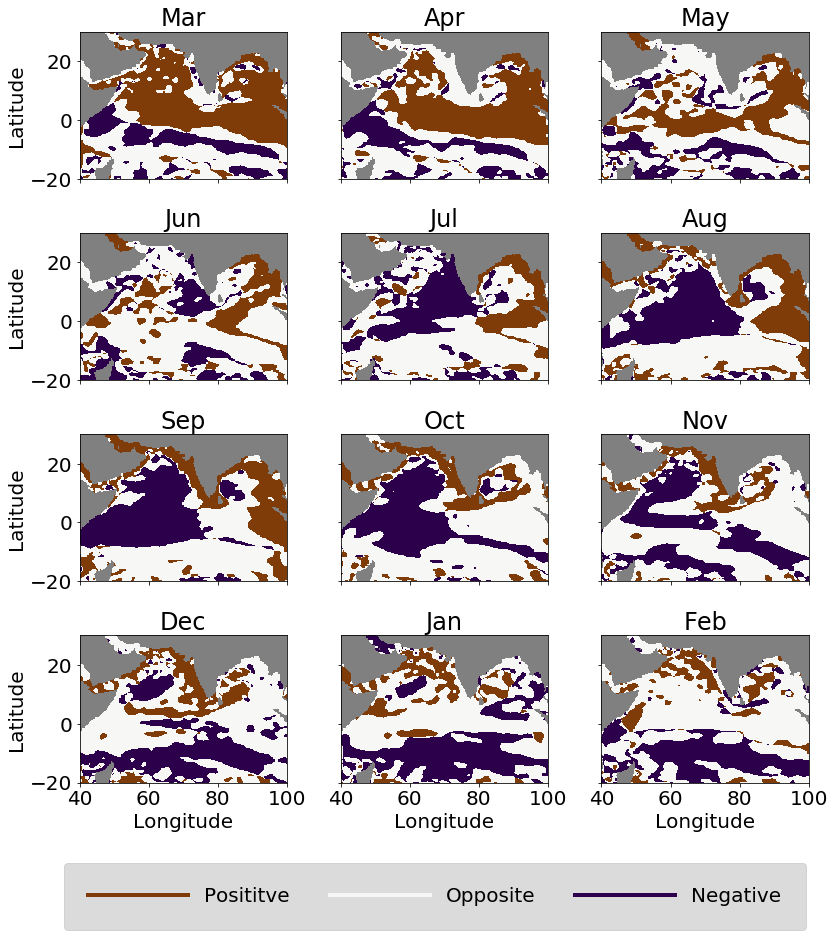

In [20]:
# negIOD

var = np.sign(negIOD_mon_sla_mon_anom_dtrnd) + np.sign(rolled_ann_cyc)
months = ['Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb']

p = var.plot.pcolormesh(x="longitude", y="latitude", col="month", col_wrap=3,
                                        cmap="PuOr_r",
                                        add_colorbar=False,
                                        vmax=1,vmin=-1, # set colorbar lims
                                        extend = 'neither', # make a box colorbar rather than pointed
                                        figsize = (12, 12),
#                                         cbar_kwargs={"label": "Sea Level Anomaly (m)"},
                                        subplot_kws={'facecolor': 'gray'}
                                       )

for i, ax in enumerate(p.axes.flat):
    ax.set_title(months[i])
    ax.axes.axis('tight')

p.set_xlabels('Longitude')
p.set_ylabels('Latitude')

cmap=plt.cm.PuOr

custom_lines = [Line2D([0], [0], color=cmap(0.), lw=4),
                Line2D([0], [0], color=cmap(.5), lw=4),
                Line2D([0], [0], color=cmap(1.), lw=4)]

# ax.legend(custom_lines, ['Posititve', 'Opposite', 'Negative'],bbox_to_anchor=(-.7, -0.5), loc='center',
#          ncol = 3,handlelength=5, borderpad=1.2, labelspacing=1.2)
leg = ax.legend(custom_lines, ['Posititve', 'Opposite', 'Negative'],loc='center',
          bbox_to_anchor = (0.02,-0.55,1,1),bbox_transform = plt.gcf().transFigure,
          ncol = 3,handlelength=5, borderpad=1.2, labelspacing=1.2)
frame = leg.get_frame()
frame.set_facecolor('lightgray')

In [21]:
# manually remove some points

# remove lower boundary (about 10N)
loninds = loninds[latinds>120]
latinds = latinds[latinds>120]

BoB_latinds = latinds
BoB_loninds = loninds

BoB_latinds = BoB_latinds[(BoB_loninds>195) & (BoB_loninds<276)]
BoB_loninds = BoB_loninds[(BoB_loninds>195) & (BoB_loninds<276)]
    
AS_latinds = latinds
AS_loninds = loninds

AS_latinds = AS_latinds[(AS_loninds>119) & (AS_loninds<195)]
AS_loninds = AS_loninds[(AS_loninds>119) & (AS_loninds<195)]

# EQ_latinds
# EQ_loninds

NameError: name 'loninds' is not defined

In [ ]:
#BoB

BoB_sta_zero = (274,121) # 98.625, 10.375
BoB_sta_lonind, BoB_sta_latind =order_coast_BoB(BoB_loninds,BoB_latinds,BoB_sta_zero)

In [ ]:
#AS
# take first piece
AS_sta_zero = (184,121) # 76.125, 10.375
AS_sta_lonind, AS_sta_latind =order_coast_AS(AS_loninds,AS_latinds,AS_sta_zero)
AS_sta_lonind = AS_sta_lonind[:-8]
AS_sta_latind = AS_sta_latind[:-8]

In [ ]:
# get data from tigress
path = '/home/jennap/projects/LRGROUP/shared_data/IOD_index/'
infn = 'dmi_updated_10_07_2020.nc'

dmi_ds = xr.open_dataset(path + infn)

https://agupubs.onlinelibrary.wiley.com/doi/pdf/10.1029/2007JD009151
http://www.bom.gov.au/climate/iod/

In [ ]:
var = sla_mon_clim_mon

# average over the positive IOD years
data = []
for ii,year in enumerate(posIODyears):
    start_time = year +'-01-01'
    end_time = year+'-12-31'
    time_slice = slice(start_time, end_time)
    data.append(var.sel(time=time_slice))
combined = xr.concat(data, dim='time')
posIODdata = combined.groupby('time.month').mean(dim='time')


# average over the negative IOD years
data = []
for ii,year in enumerate(negIODyears):
    start_time = year +'-01-01'
    end_time = year+'-12-31'
    time_slice = slice(start_time, end_time)
    data.append(var.sel(time=time_slice))
combined = xr.concat(data, dim='time')
negIODdata = combined.groupby('time.month').mean(dim='time')



# average over the neutral IOD years
data = []
for ii,year in enumerate(neuIODyears):
    start_time = year +'-01-01'
    end_time = year+'-12-31'
    time_slice = slice(start_time, end_time)
    data.append(var.sel(time=time_slice))
combined = xr.concat(data, dim='time')
neuIODdata = combined.groupby('time.month').mean(dim='time')

